In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
data = pd.read_csv('Divar.csv', low_memory=False, encoding='utf-8-sig')
data.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,user_type,description,title,rent_mode,...,property_type,regular_person_capacity,extra_person_capacity,cost_per_extra_person,rent_price_on_regular_days,rent_price_on_special_days,rent_price_at_weekends,location_latitude,location_longitude,location_radius
0,0,temporary-rent,villa,karaj,mehrshahr,2024-08-01 00:00:00,مشاور املاک,۵۰۰متر\n۲۰۰متر بنا دوبلکس\n۳خواب\nاستخر آبگرم ...,باغ ویلا اجاره روزانه استخر داخل لشکرآباد سهیلیه,NaN,...,NaN,4.0,6,350000.0,1500000.0,3.500000e+09,3500000.0,35.811684,50.936600,500.0
1,1,residential-sell,apartment-sell,tehran,gholhak,2024-05-01 00:00:00,مشاور املاک,دسترسی عالی به مترو و شریعتی \nمشاعات تمیز \nب...,۶۰ متر قلهک فول امکانات,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0
2,2,residential-rent,apartment-rent,tehran,tohid,2024-10-01 00:00:00,NaN,تخلیه پایان ماه,آپارتمان ۳ خوابه ۱۳۲ متر,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.703865,51.373459,NaN
3,3,commercial-rent,office-rent,tehran,elahiyeh,2024-06-01 00:00:00,NaN,فرشته تاپ لوکیشن\n۹۰ متر موقعیت اداری\nیک اتاق...,فرشته ۹۰ متر دفتر کار مدرن موقعیت اداری,مقطوع,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,residential-sell,apartment-sell,mashhad,emamreza,2024-05-01 00:00:00,مشاور املاک,هلدینگ ساختمانی اکبری\n\nهمراه شما هستیم برای ...,۱۱۵ متری/شمالی رو به آفتاب/اکبری,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

## Phase 1 of Handling Missing Values

### User_Type

In [4]:
data.drop('user_type', axis=1, inplace=True)

### Rent_Mode, Price_Mode and Credit_Mode

Because information of <code>rent_mode</code>, <code>price_mode</code> and <code>credit_mode</code> is   
represented in other columns (<code>NaN</code> and zero values of columns <code>rent_value</code>, <code>price_value</code> and <code>credit_value</code>   respectively)

In [5]:
# free
print(data[data.rent_mode == 'مجانی']['rent_value'].sum())
print(data[data.price_mode == 'مجانی']['price_value'].sum())
print(data[data.credit_mode == 'مجانی']['credit_value'].sum())

0.0
0.0
0.0


In [3]:
# on agreement
print(data[data.rent_mode == 'توافقی']['rent_value'].isna().all())
print(data[data.price_mode == 'توافقی']['price_value'].isna().all())
print(data[data.credit_mode == 'توافقی']['credit_value'].isna().all())

True
True
True


In [5]:
# dropping rows with prices on agreement
print(f'number of records before: {len(data)}')
data = data[data.rent_mode != 'توافقی']
data = data[data.price_mode != 'توافقی']
data = data[data.credit_mode != 'توافقی']
print(f'number of records after: {len(data)}')


number of records before: 1000000
number of records after: 992938


In [6]:
# dropping cols
data.drop(['rent_mode', 'price_mode', 'credit_mode'], axis=1, inplace=True)

### Rooms_Count Missing Rows

Missing values of column <code>rooms_count</code> can not be handled properly, even if data from <code>description</code> is used. So rows that have missing values in this column are dropped.

In [6]:
# percentage of missing values
data.rooms_count.isna().sum() / len(data) * 100

np.float64(15.072542293677953)

In [7]:
# number of missing values
data.rooms_count.isna().sum()

np.int64(149661)

In [8]:
# imputation using description
np.logical_and(data.description.str.contains('خواب'), data.rooms_count.isna()).sum()

np.int64(7511)

In [7]:
# dropping rows without information in rooms_count
print(len(data))
data.dropna(subset=['rooms_count'], inplace=True)
print(len(data))

992938
843277


### Floor Missing Rows

Even if missing values of <code>floor</code> are imputed using information from <code>description</code> almost 30 percent of data will be missing.

In [10]:
# missing percentage of floor column
data.floor.isna().sum() / len(data) * 100

np.float64(35.92781494099804)

In [11]:
# number of missing values
data.floor.isna().sum() 

np.int64(302971)

In [12]:
# how many missing values can be handled using information from description
np.logical_and(data.description.str.contains('طبقه'), data.floor.isna()).sum()

np.int64(58730)

In [8]:
# dropping NaNs of floor
print(len(data))
data.dropna(subset=['floor'], inplace=True)
print(len(data))

843277
540306


### Empty Columns

After removing those rows, some of columns are 100% missing. So those columns are removed, too.

In [9]:
columns_to_drop1 = [
    'rent_to_single', 'has_water', 'has_electricity', 'has_gas', 'has_security_guard', 'has_barbecue', 'has_pool', 'has_jacuzzi',
    'has_sauna', 'property_type', 'rent_price_on_regular_days', 'rent_price_on_special_days', 'rent_price_at_weekends', 
    'regular_person_capacity', 'extra_person_capacity', 'cost_per_extra_person', 'land_size', 'has_business_deed'
]
for col in columns_to_drop1:
    missing_percentage = data[col].isna().sum() / len(data) * 100
    print(f'Missing Percentage of {col}: {missing_percentage} %')

Missing Percentage of rent_to_single: 99.99833427724289 %
Missing Percentage of has_water: 100.0 %
Missing Percentage of has_electricity: 100.0 %
Missing Percentage of has_gas: 100.0 %
Missing Percentage of has_security_guard: 100.0 %
Missing Percentage of has_barbecue: 100.0 %
Missing Percentage of has_pool: 100.0 %
Missing Percentage of has_jacuzzi: 100.0 %
Missing Percentage of has_sauna: 100.0 %
Missing Percentage of property_type: 100.0 %
Missing Percentage of rent_price_on_regular_days: 100.0 %
Missing Percentage of rent_price_on_special_days: 100.0 %
Missing Percentage of rent_price_at_weekends: 100.0 %
Missing Percentage of regular_person_capacity: 100.0 %
Missing Percentage of extra_person_capacity: 100.0 %
Missing Percentage of cost_per_extra_person: 100.0 %
Missing Percentage of land_size: 100.0 %
Missing Percentage of has_business_deed: 99.25060983960941 %


In [10]:
# dropping columns that are totally missing
data.drop(columns=columns_to_drop1, inplace=True)

### Rent Type Column

Now let's take a closer look at the <code>rent_type</code> column.

In [17]:
# missing percentage in rent_type column
data.rent_type.isna().sum() / len(data) * 100

np.float64(84.91364988887823)

In [16]:
# distribution of not null values of rent_type column
data.rent_type.value_counts(normalize=True)

rent_type
rent_credit    0.998858
full_credit    0.001142
Name: proportion, dtype: float64

In [17]:
# checking validity of rent_value in cases of full_credit
(data[data.rent_type == 'full_credit']['rent_value'] != 0).sum()

np.int64(0)

In [18]:
# checking validity of rent_value in cases of rent_credit
(data[data.rent_type == 'rent_credit']['rent_value'] == 0).sum()

np.int64(19543)

Since this column has low information content to offer and there's some contradictions with other columns. This column is dropped.

In [11]:
# dropping rent_type column
data.drop('rent_type', axis=1, inplace=True)

At the end of first phase of handling missing values, dataframe has the following shape:

In [20]:
data.shape

(540306, 39)

## Phase 2 of Handling Missing Values

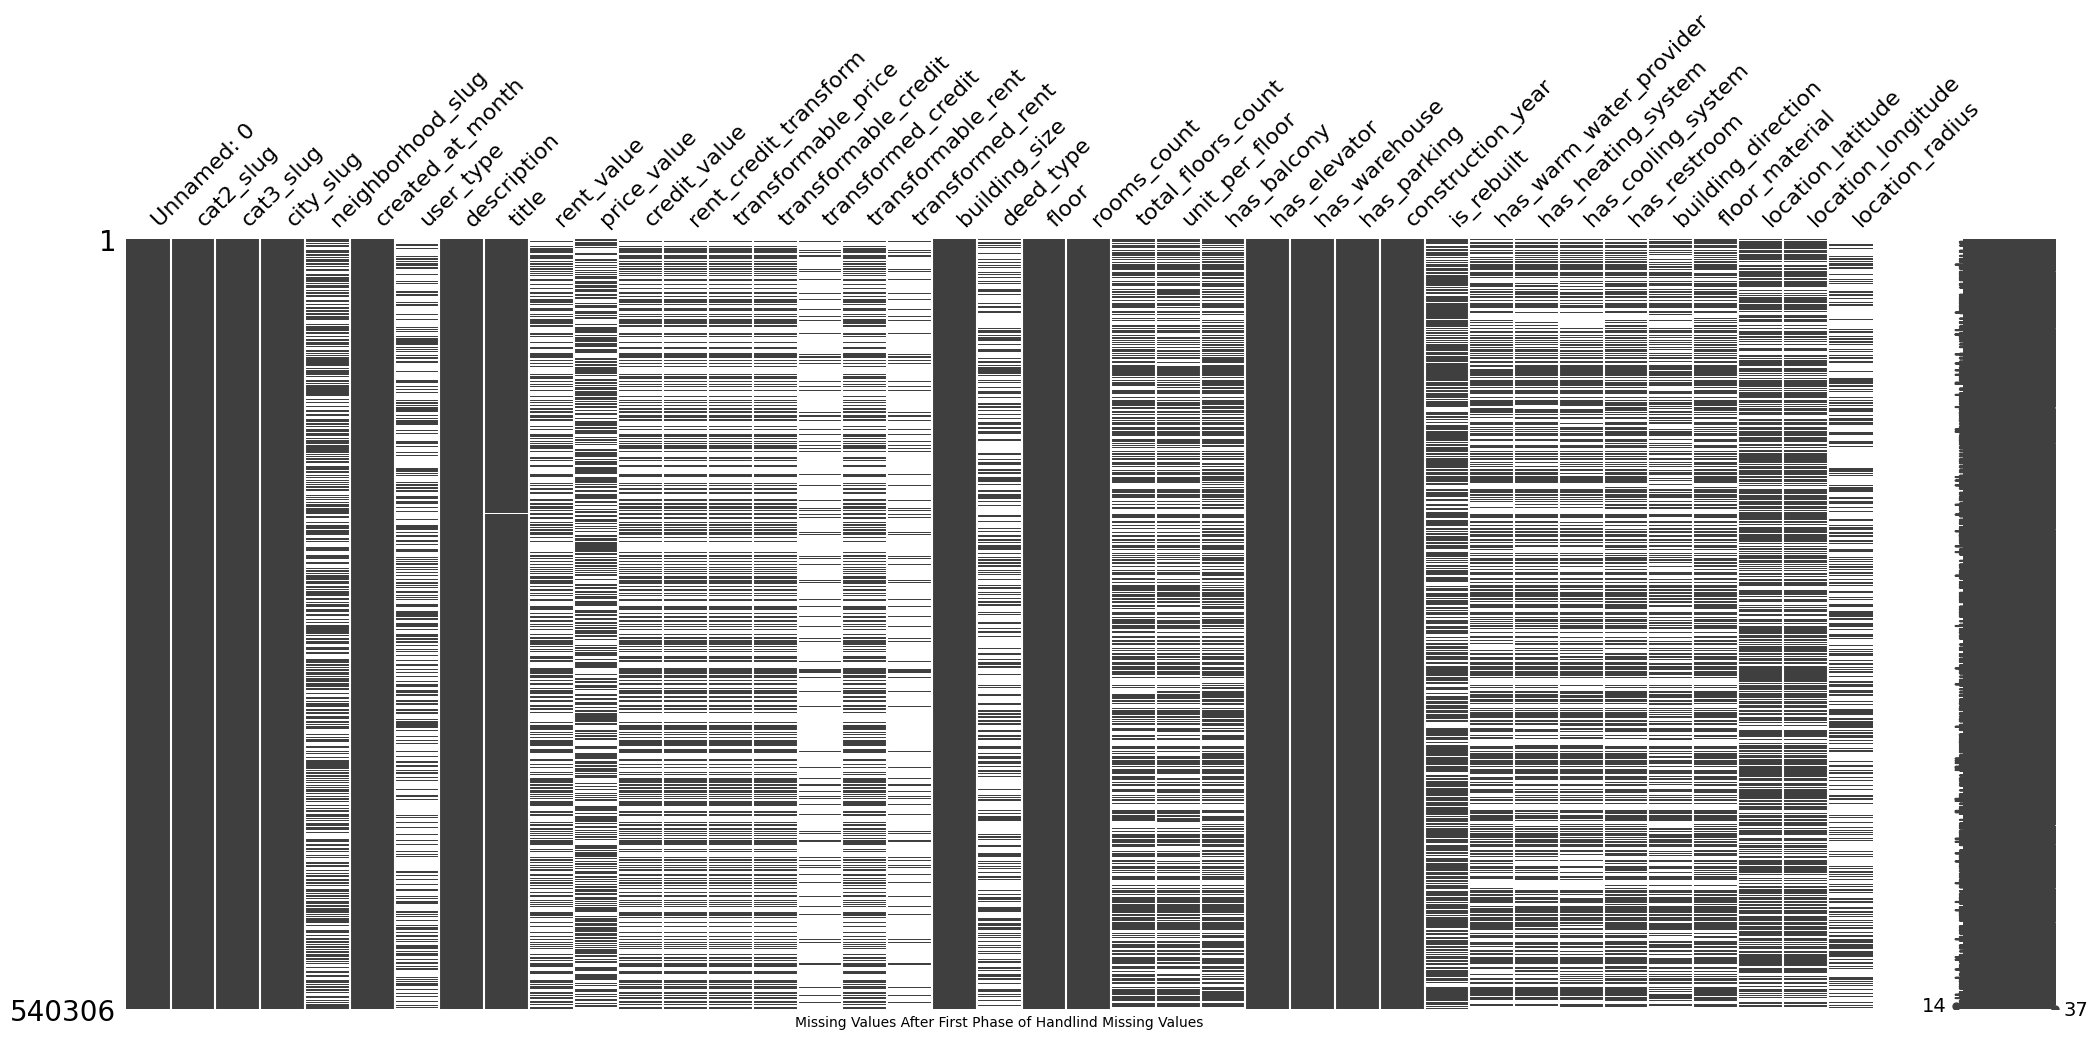

In [21]:
msno.matrix(data)
plt.xlabel('Missing Values After First Phase of Handlind Missing Values')
plt.show()

<Axes: >

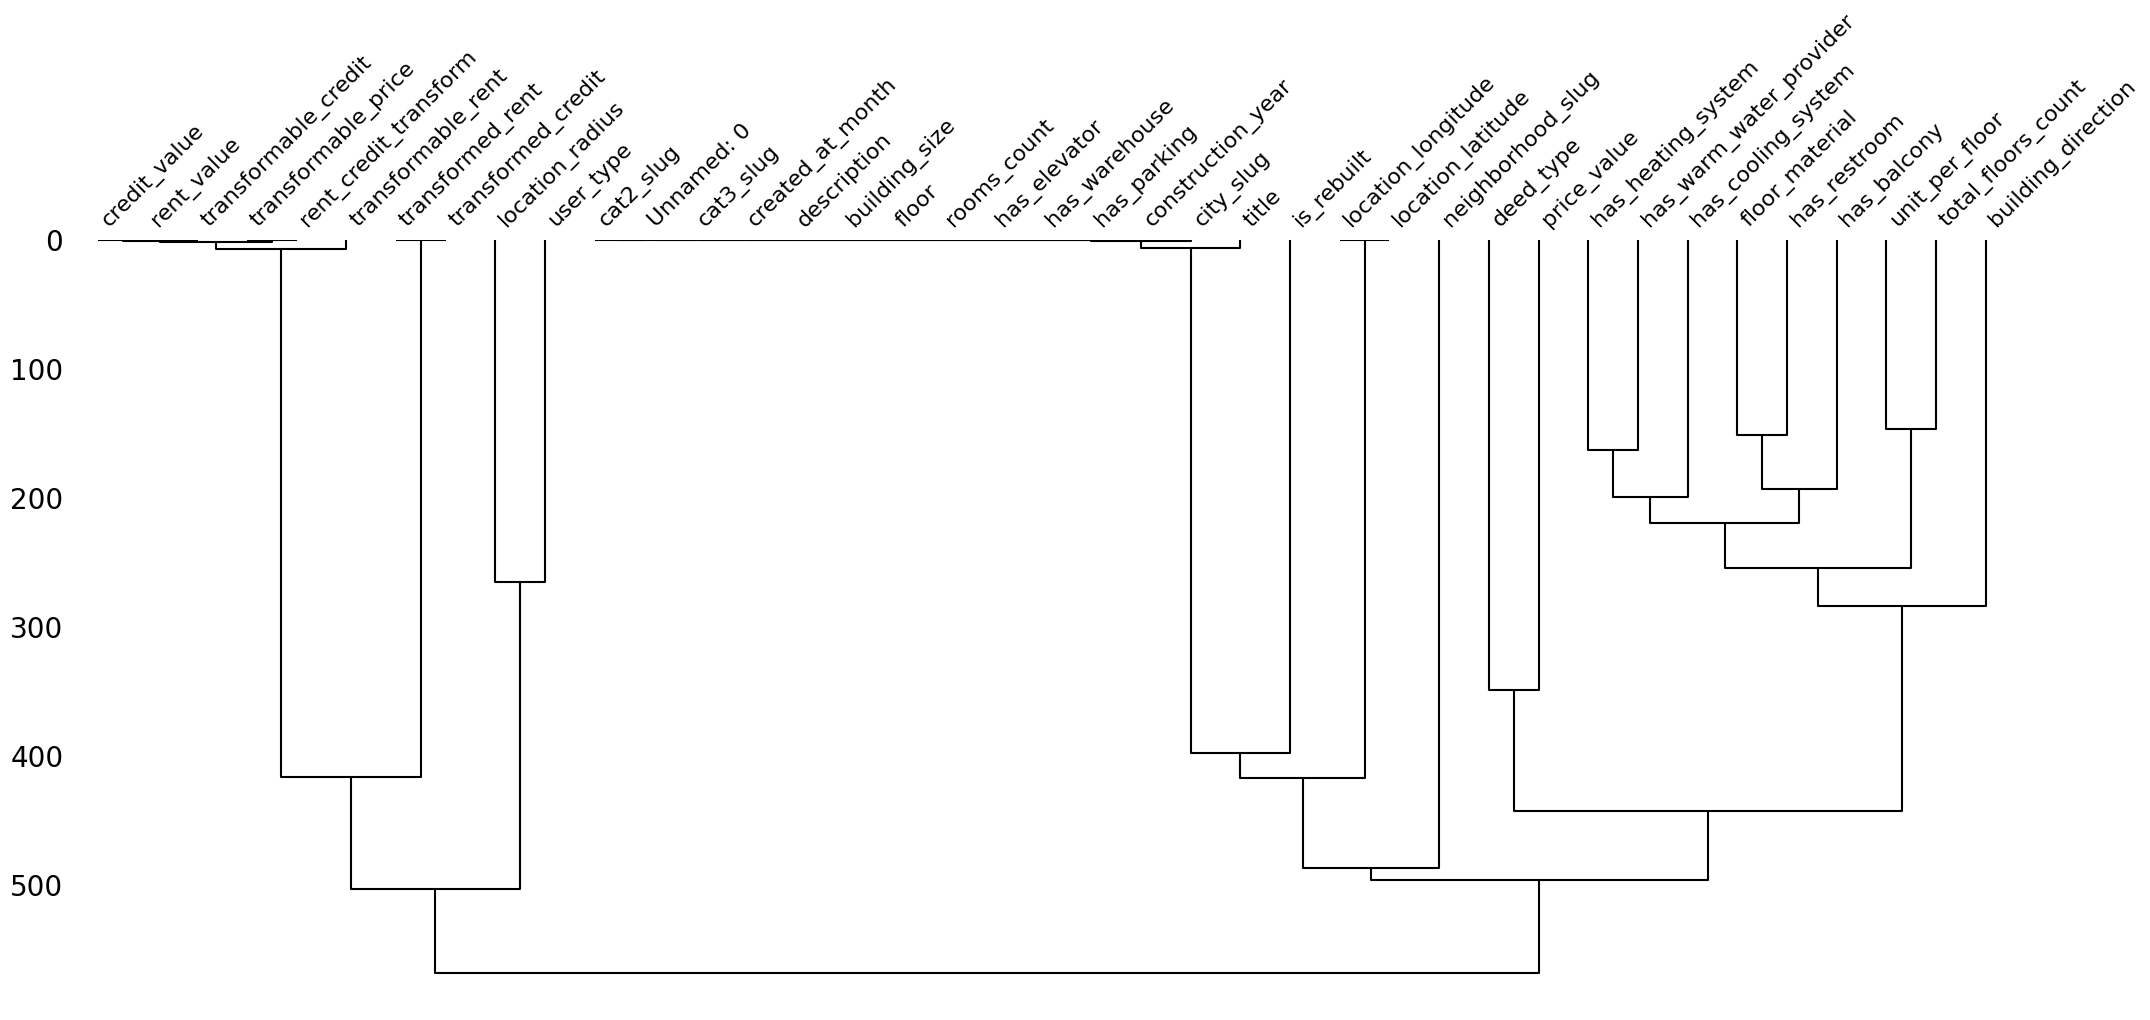

In [22]:
msno.dendrogram(data)

### Location_Longitude and Location_Latitude

As shown in the preceding charts, <code>location_latitude</code> and <code>location_longitude</code> share missing values.

In [23]:
# missing percentage
data.location_latitude.isna().sum() / len(data) * 100

np.float64(31.87156907382113)

In [24]:
# confirmation of simultaneous missing values
(data.location_latitude.isna() == data.location_longitude.isna()).all()

np.True_

In [12]:
# dropping NaNs of latitude(which simultanousely drops NaNs of longitude)
print(len(data))
data.dropna(subset=['location_latitude'], inplace=True)
print(len(data))

540306
368102


### Trial and Error to find a way 

<Axes: >

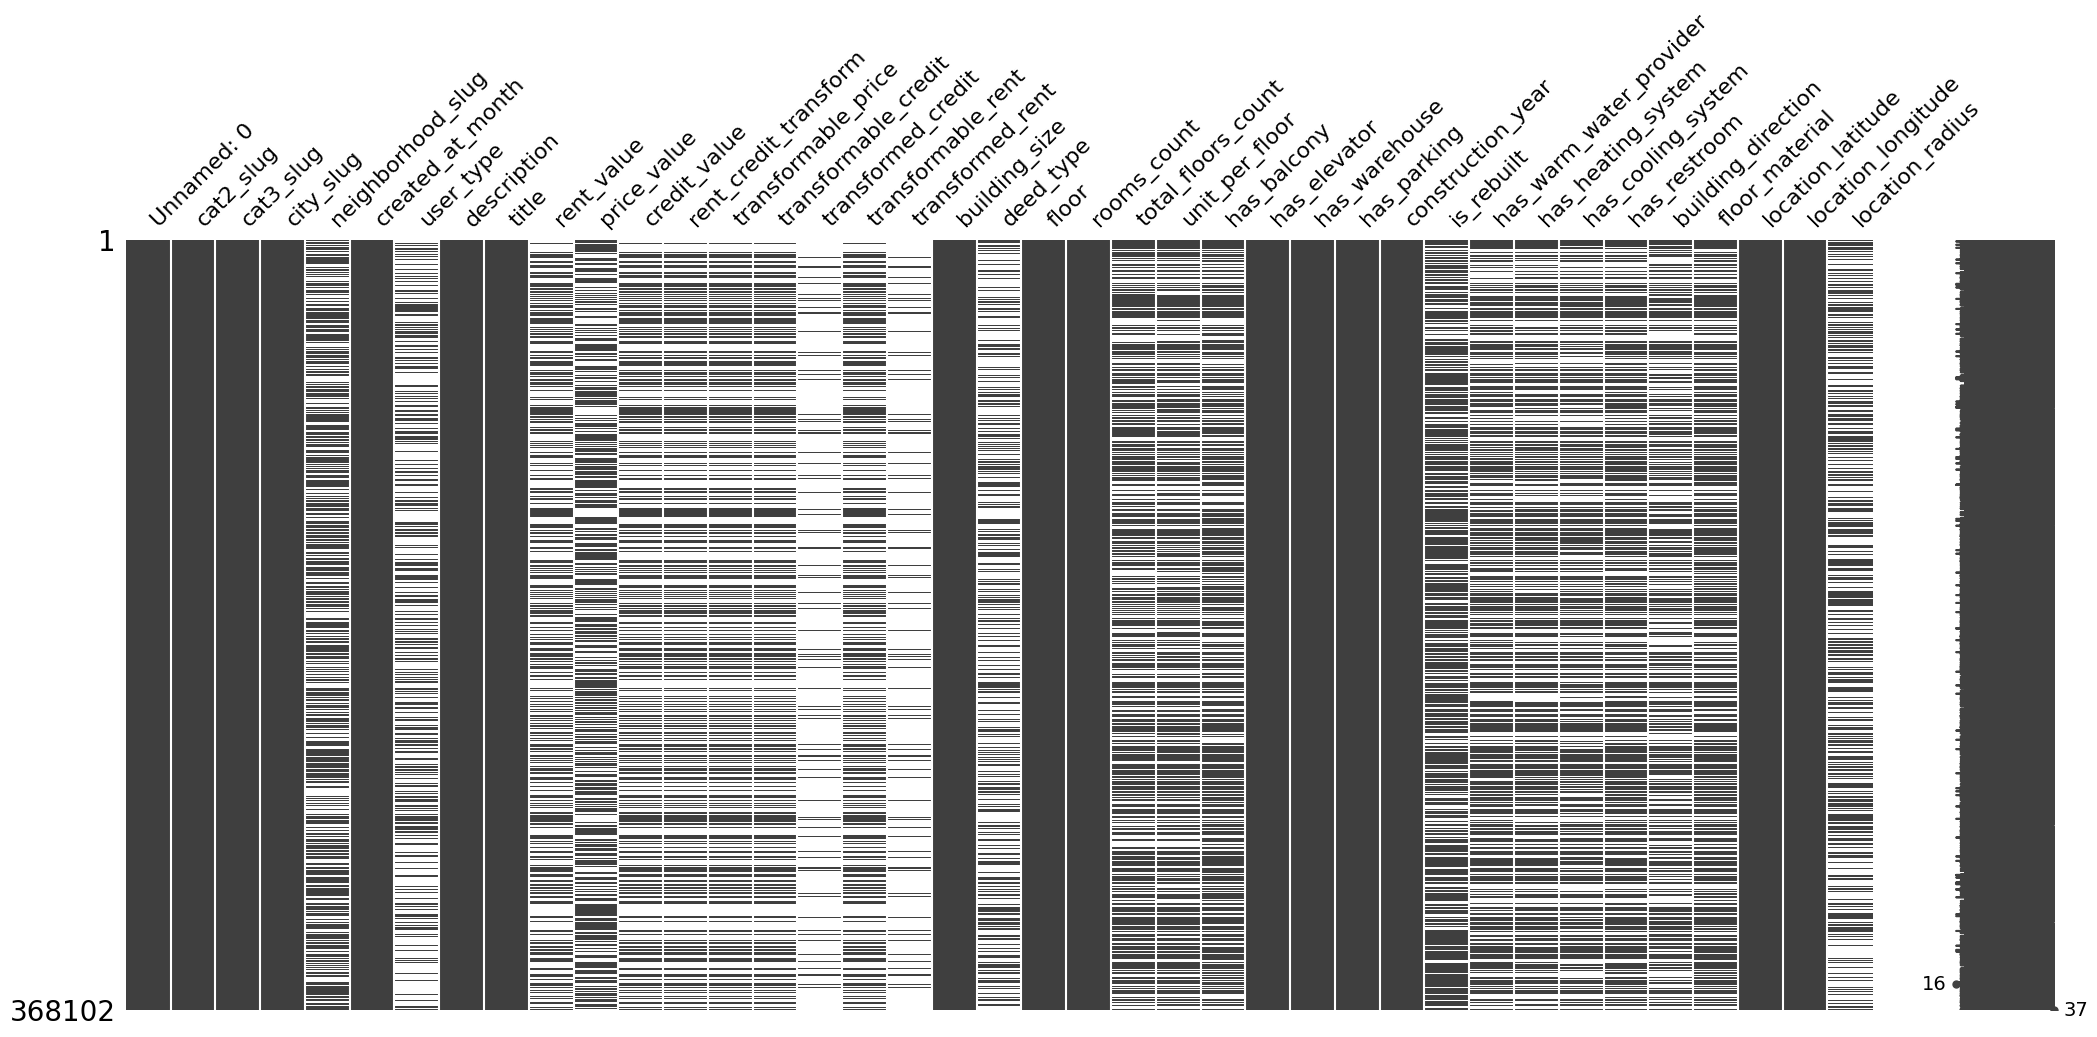

In [26]:
# missing values after droping NaNs of latitude and longitude
msno.matrix(data)

<code>neighborhood_slug</code> seems to be a good candidate for dropping missing rows.

In [27]:
# missing percentage of neighborhood_slug
data.neighborhood_slug.isna().sum() / len(data) * 100

np.float64(42.369234614318856)

<Axes: >

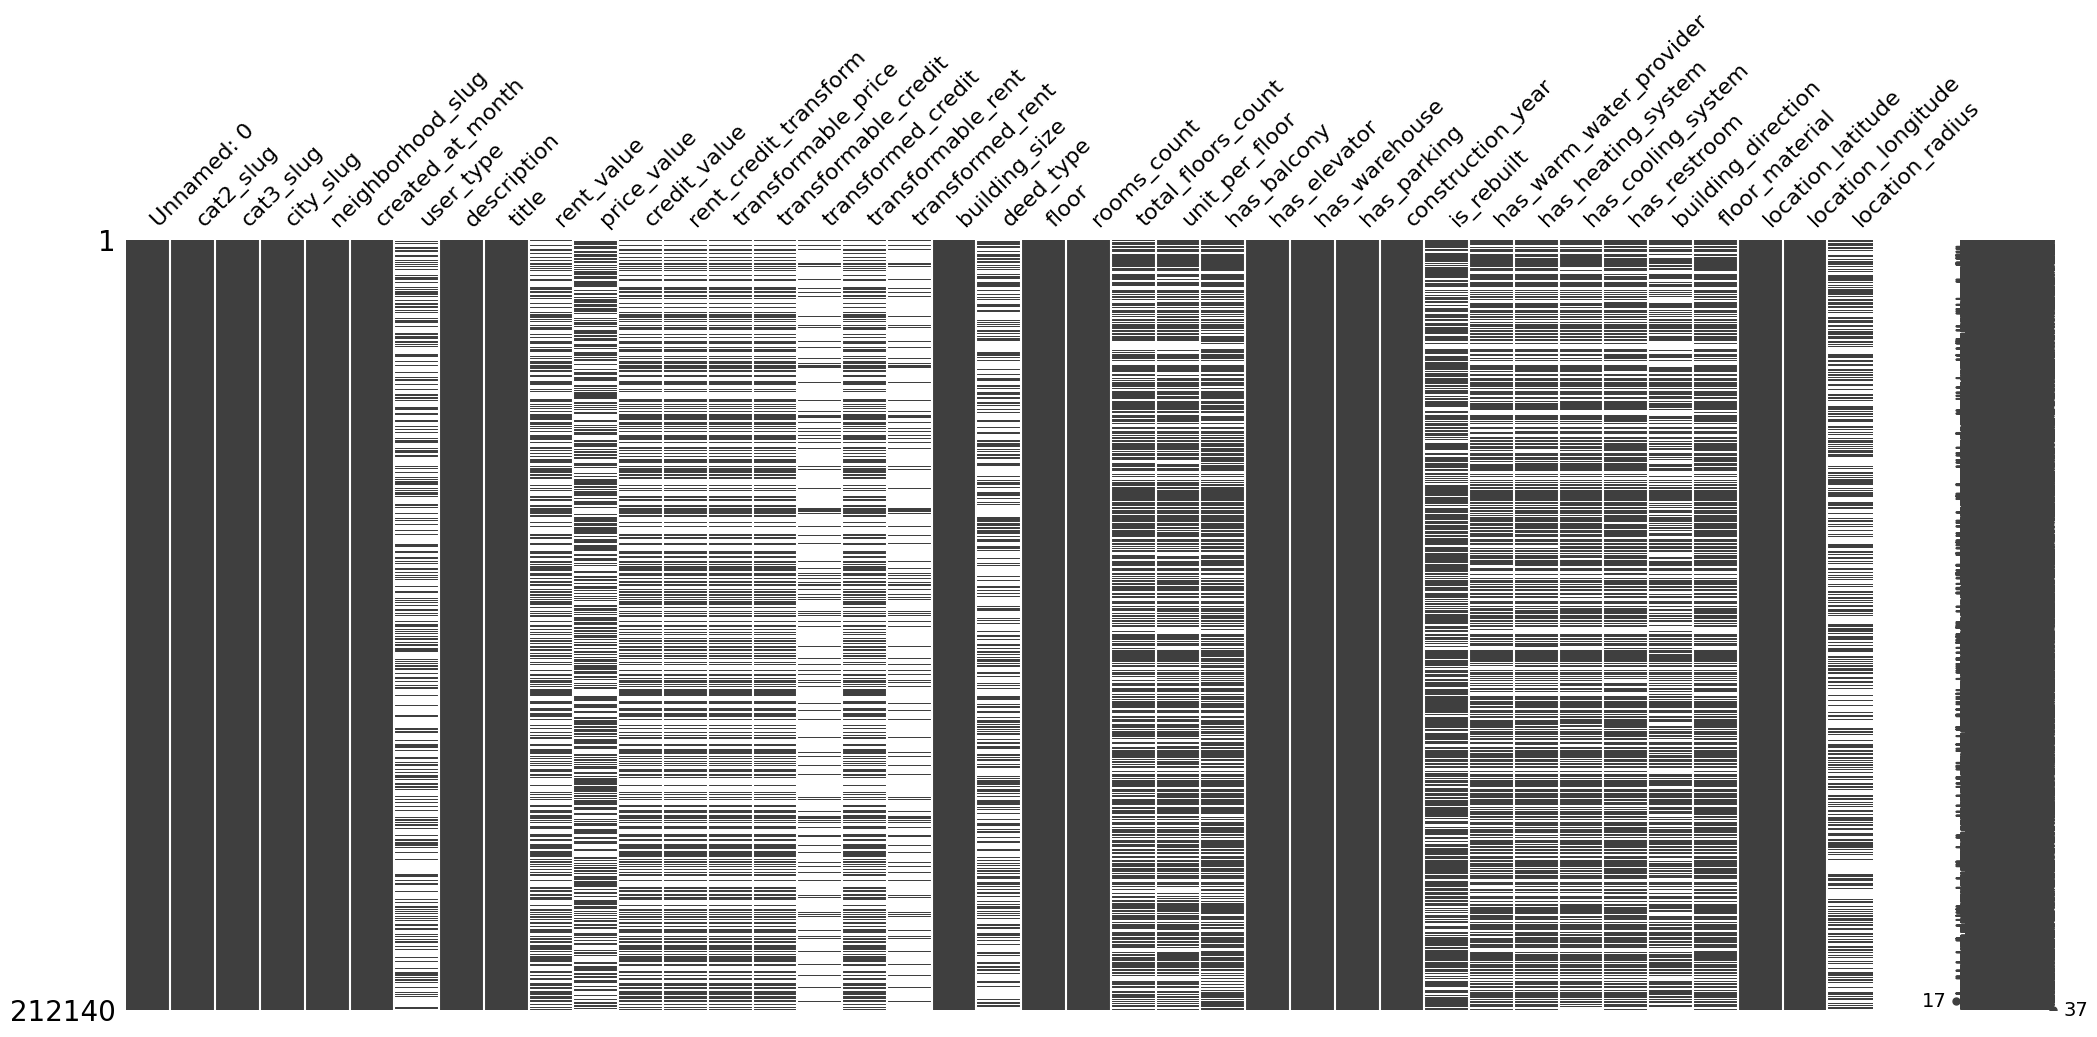

In [28]:
# if dropna on neighborhood_slug
msno.matrix(data.dropna(subset=['neighborhood_slug']))

<Axes: >

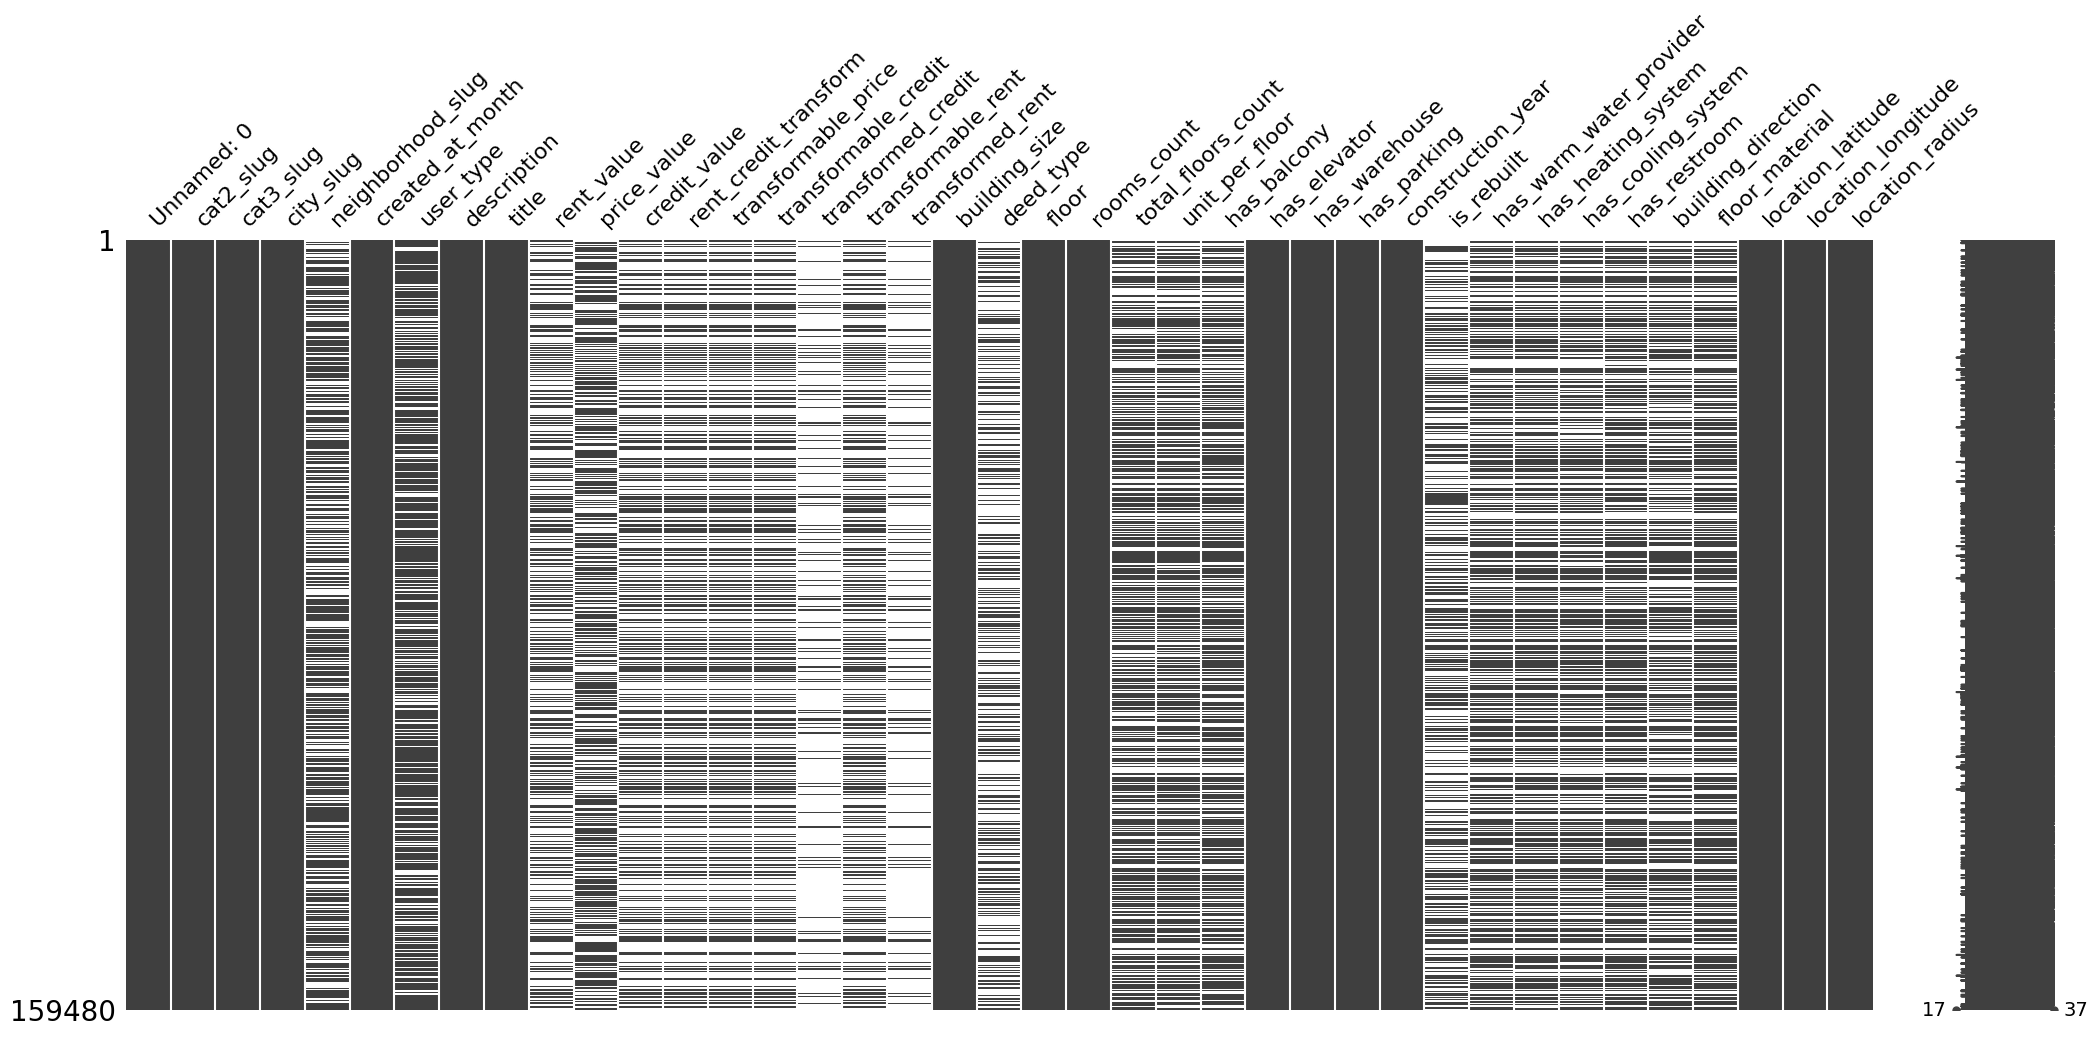

In [29]:
# if dropna on location_radius
msno.matrix(data.dropna(subset=['location_radius']))

<Axes: >

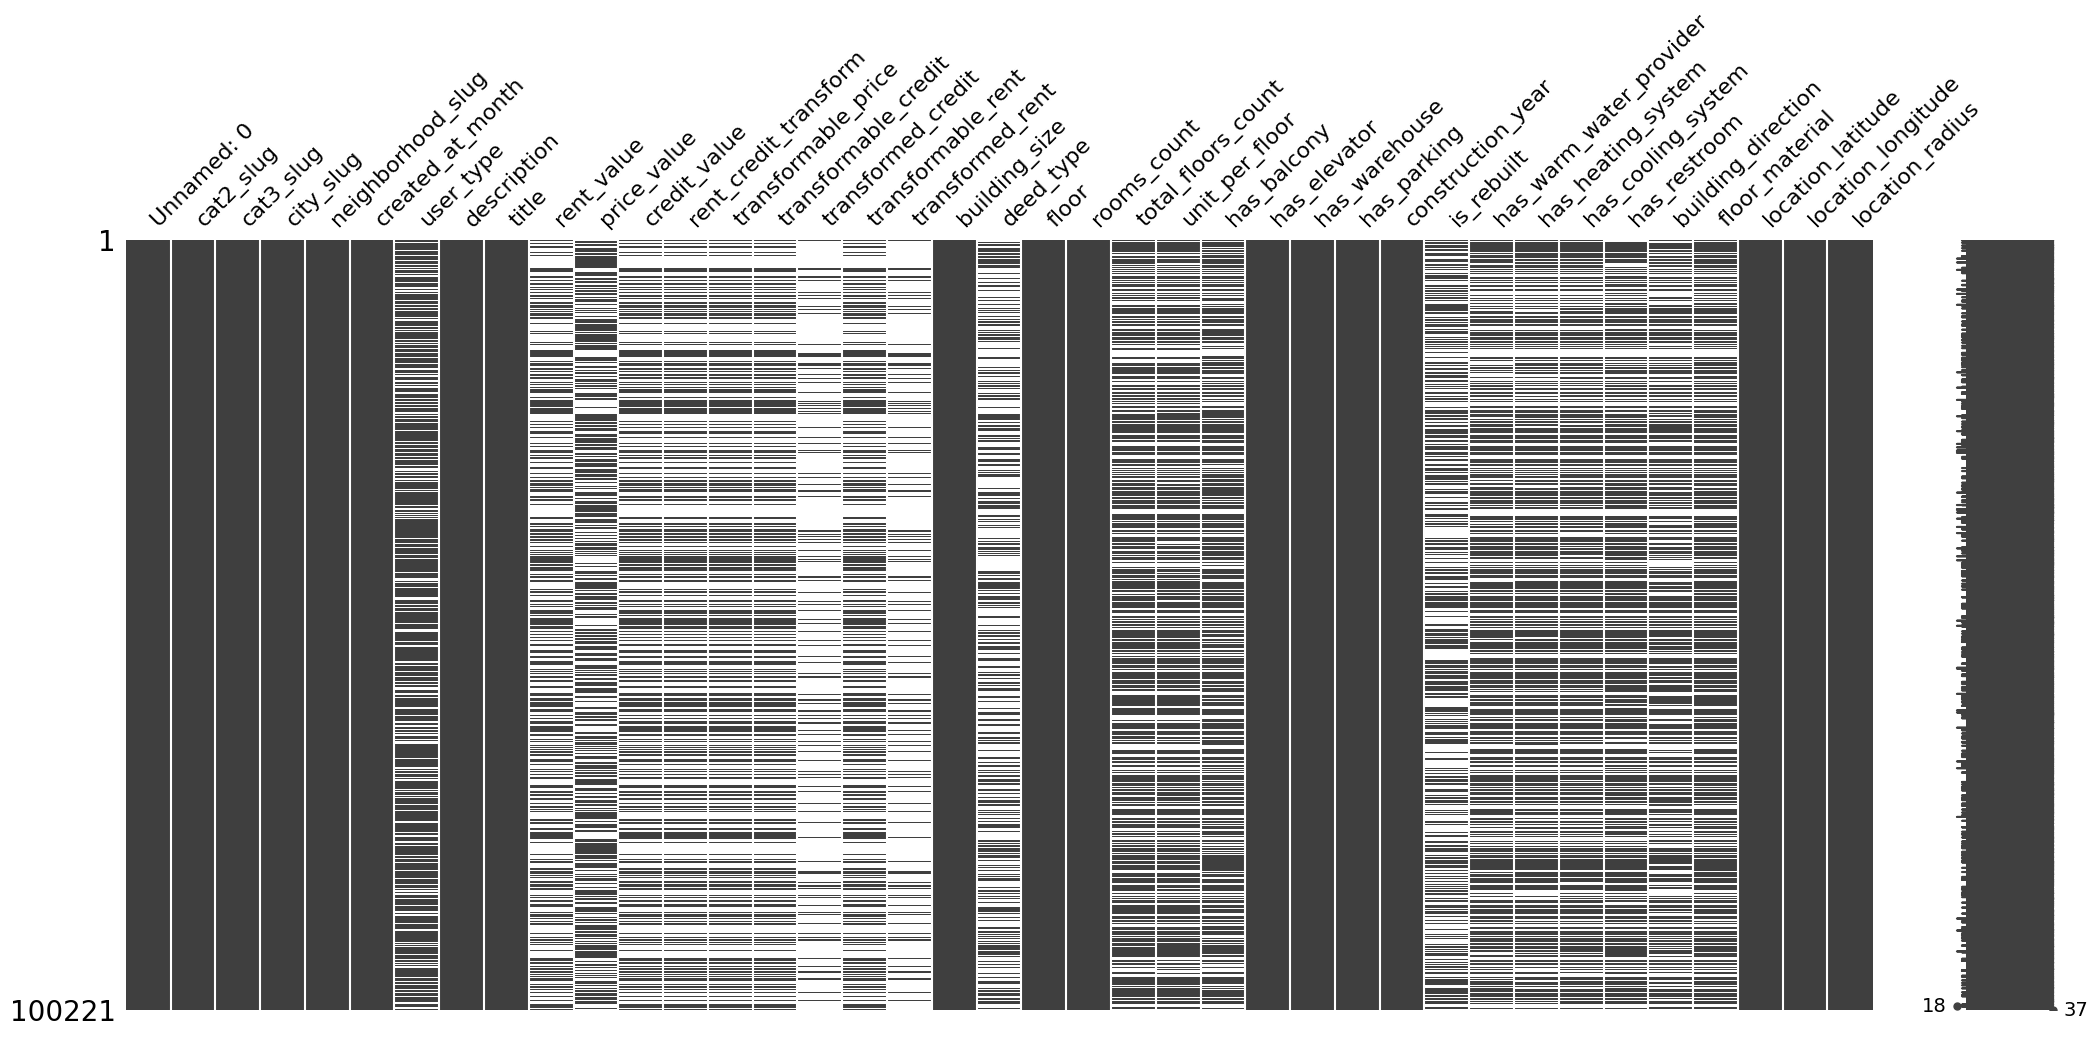

In [30]:
# if dropna on both neighborhood_slug and location_radius
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius']))

<Axes: >

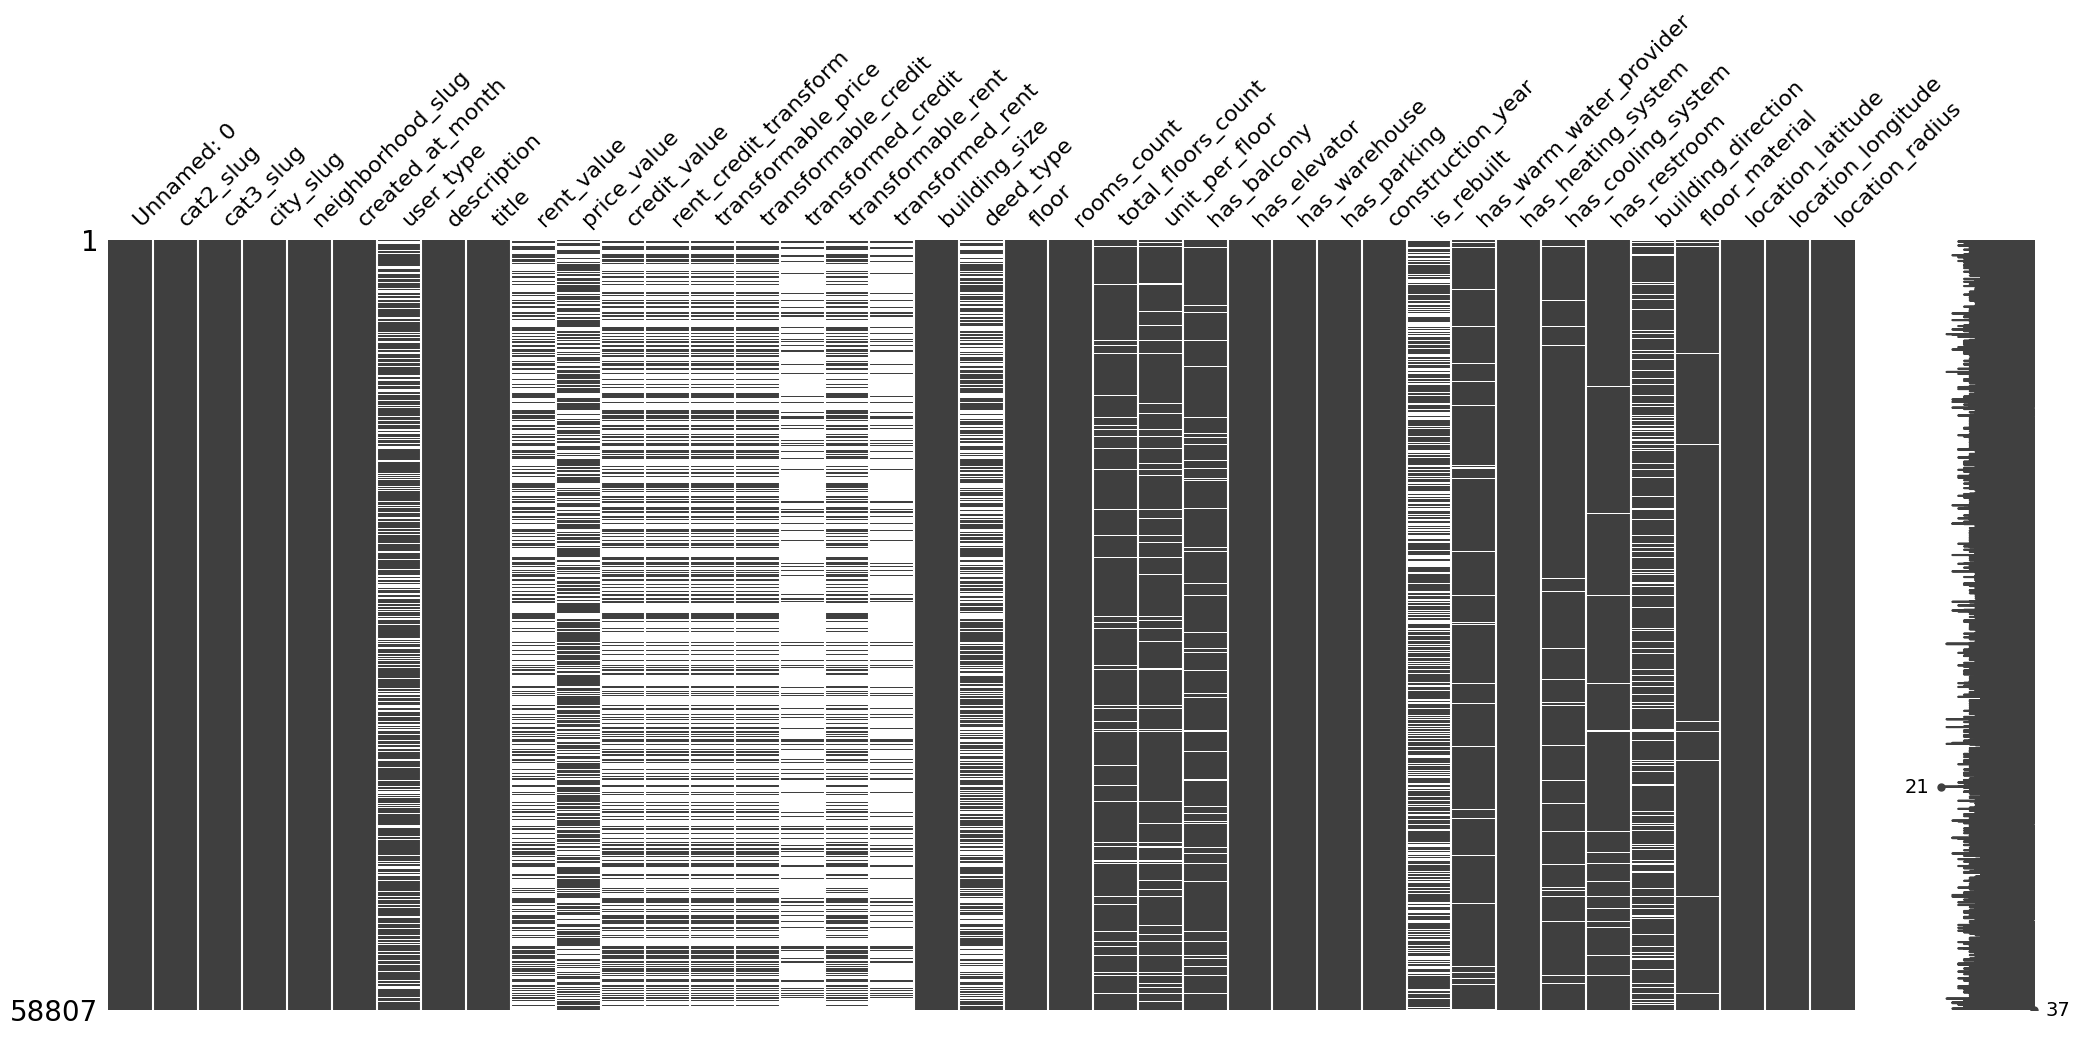

In [31]:
# if dropna on neighborhood_slug, location_radius and has_heating_system
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius', 'has_heating_system']))

<Axes: >

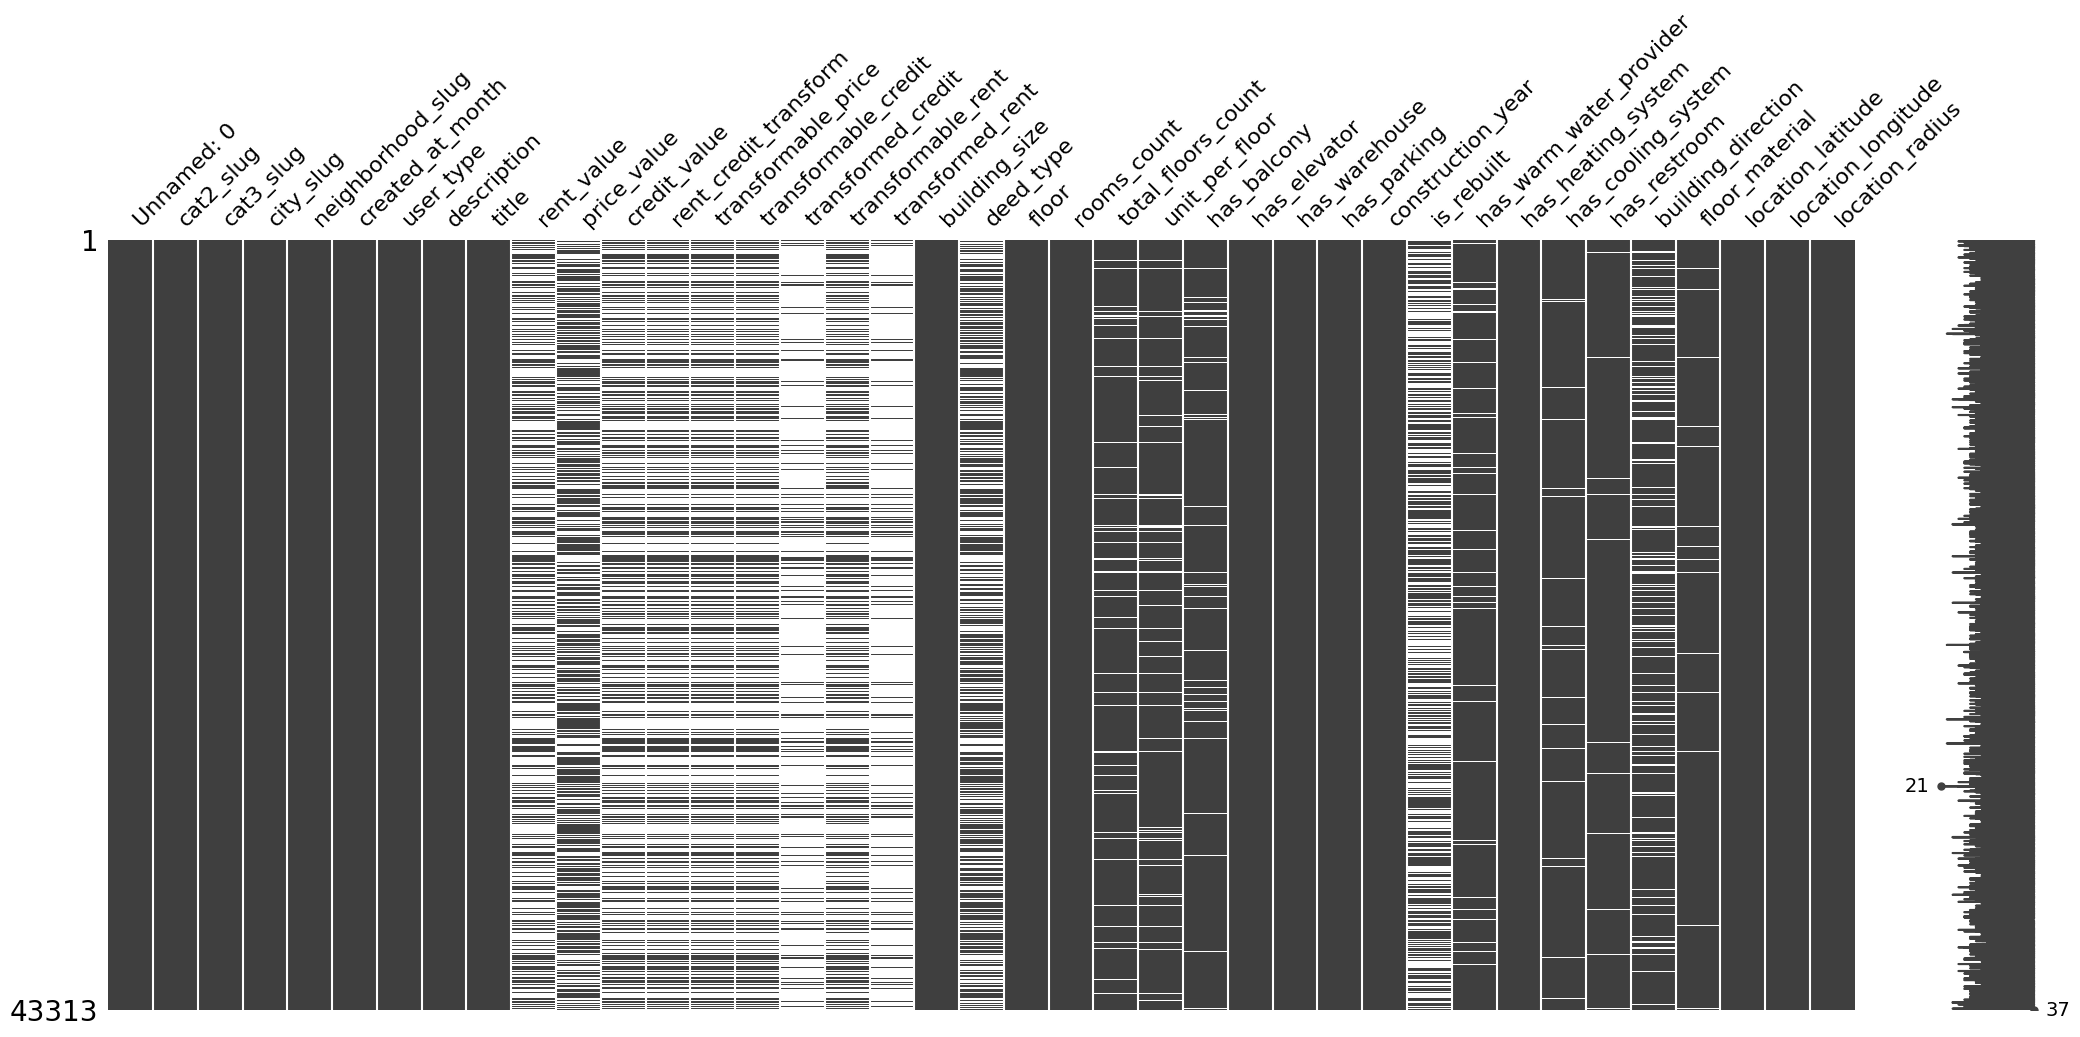

In [32]:
# adding more columns and seeing what they will look like after dropping missing rows
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius', 'has_heating_system', 'user_type']))

<Axes: >

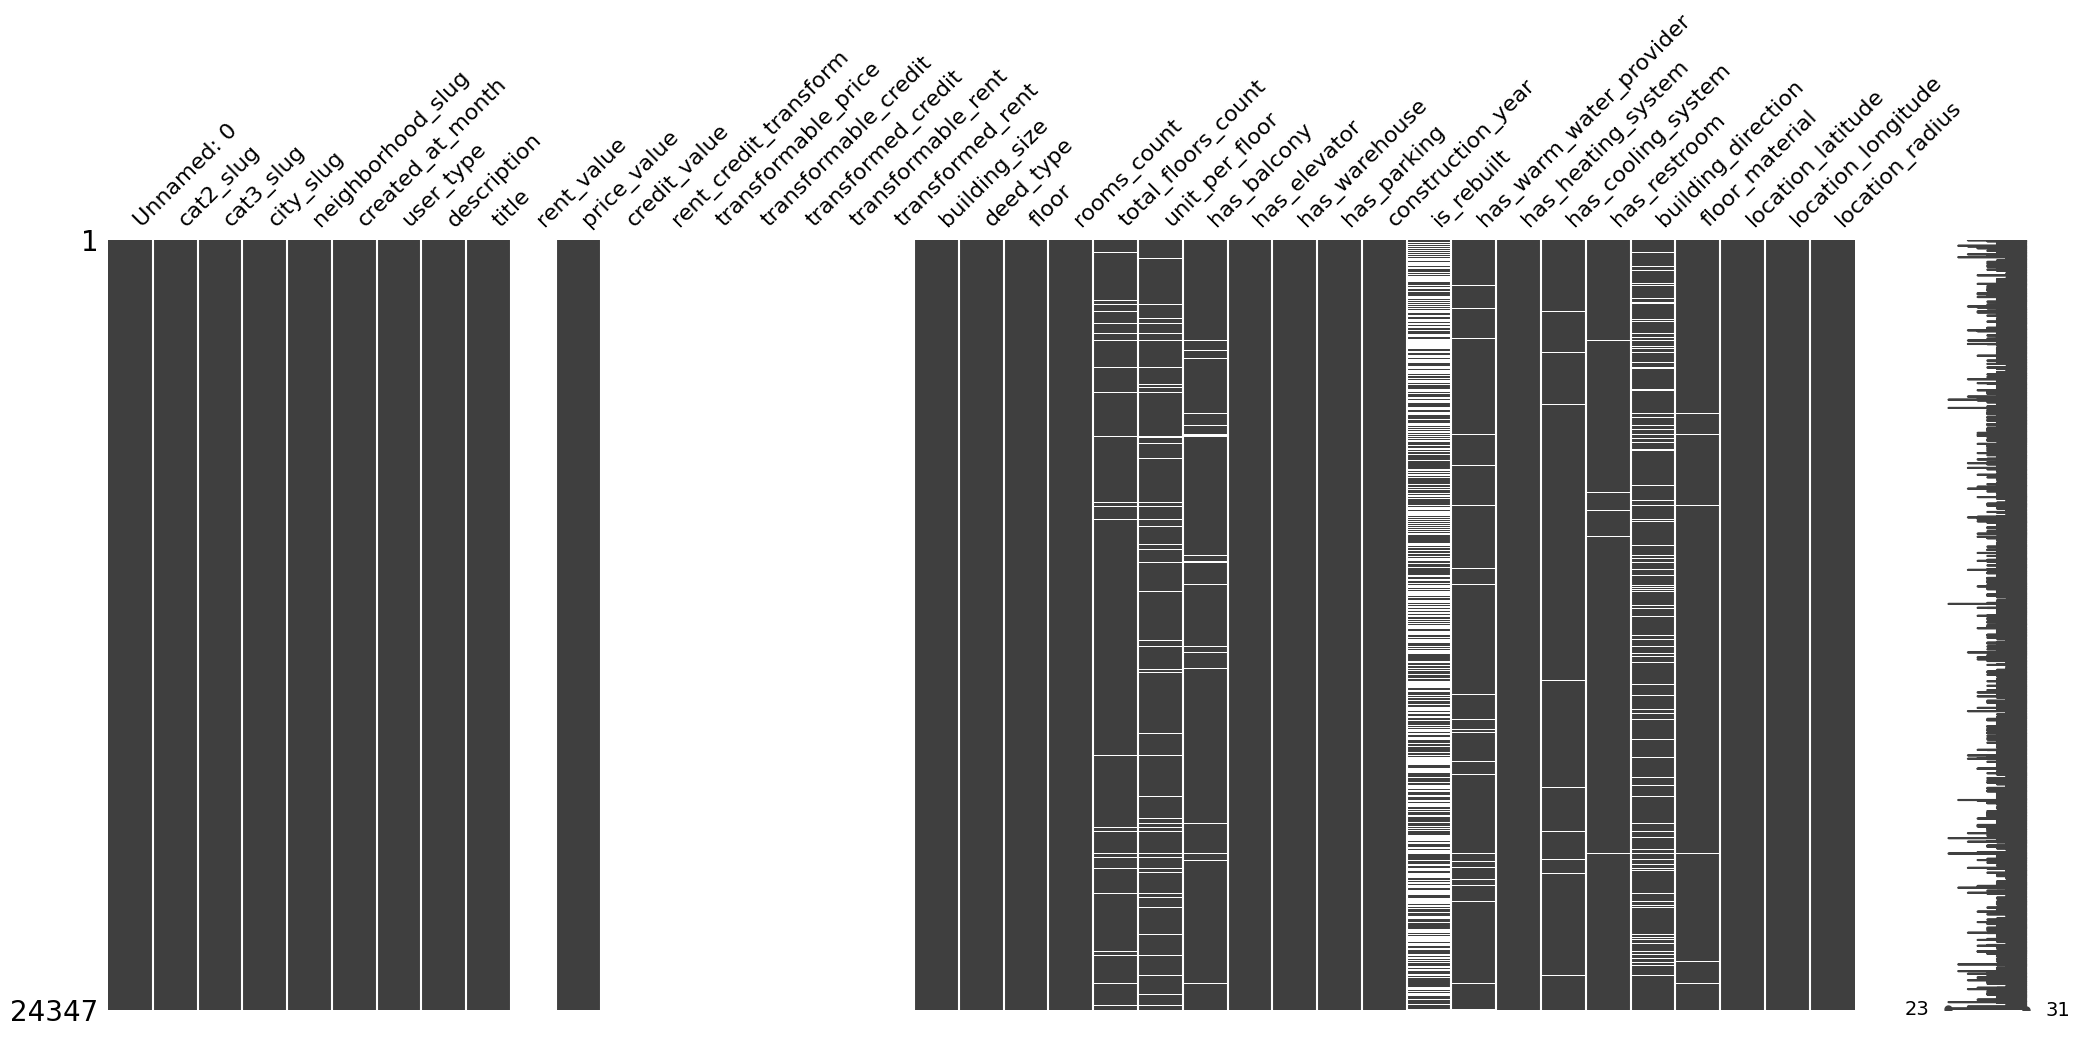

In [33]:
# adding more columns and checking the resulting dataset
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius', 'has_heating_system', 'user_type', 'deed_type']))

So we can not drop missing rows of deed_type, because we will lose all information about prices. We will drop this column

<Axes: >

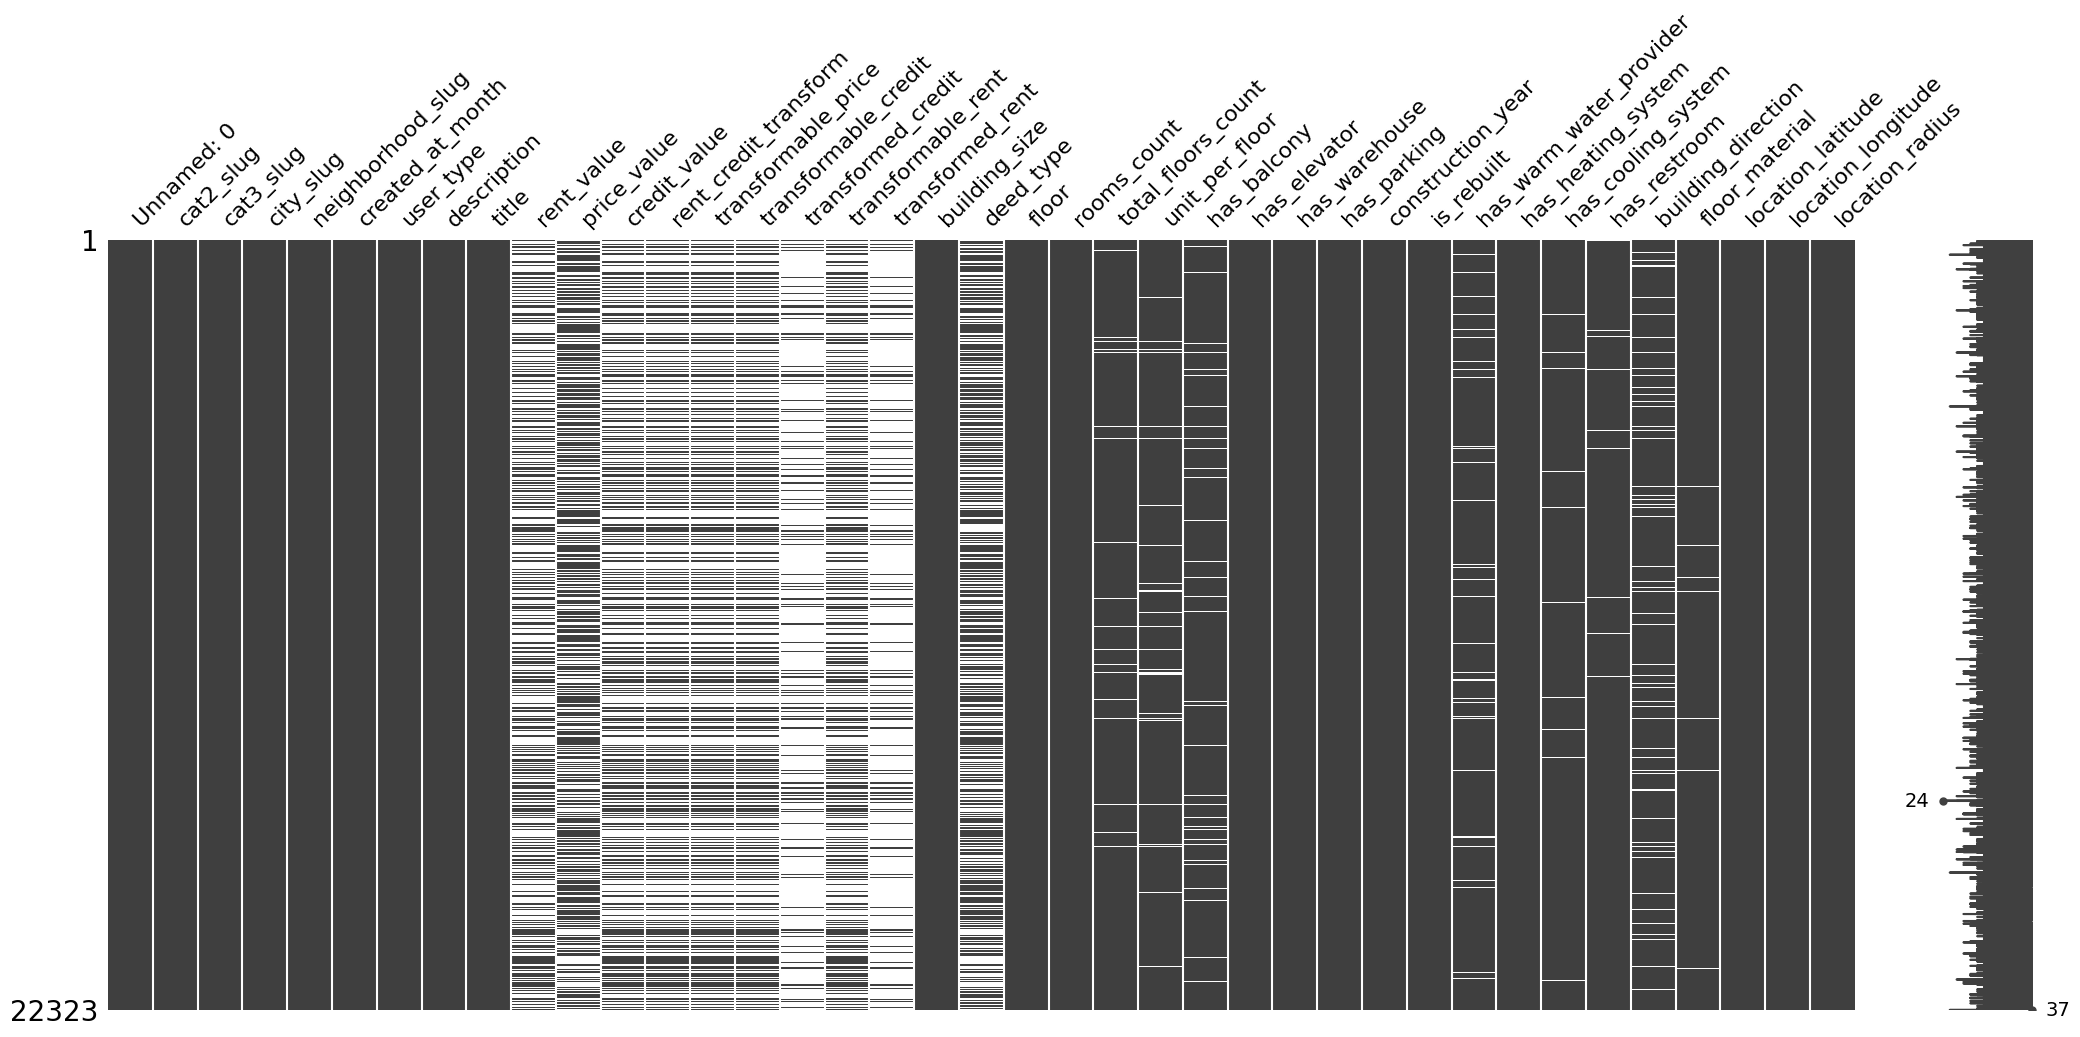

In [34]:
# checking different combinations of columns
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius', 'has_heating_system', 'user_type', 'is_rebuilt']))

<Axes: >

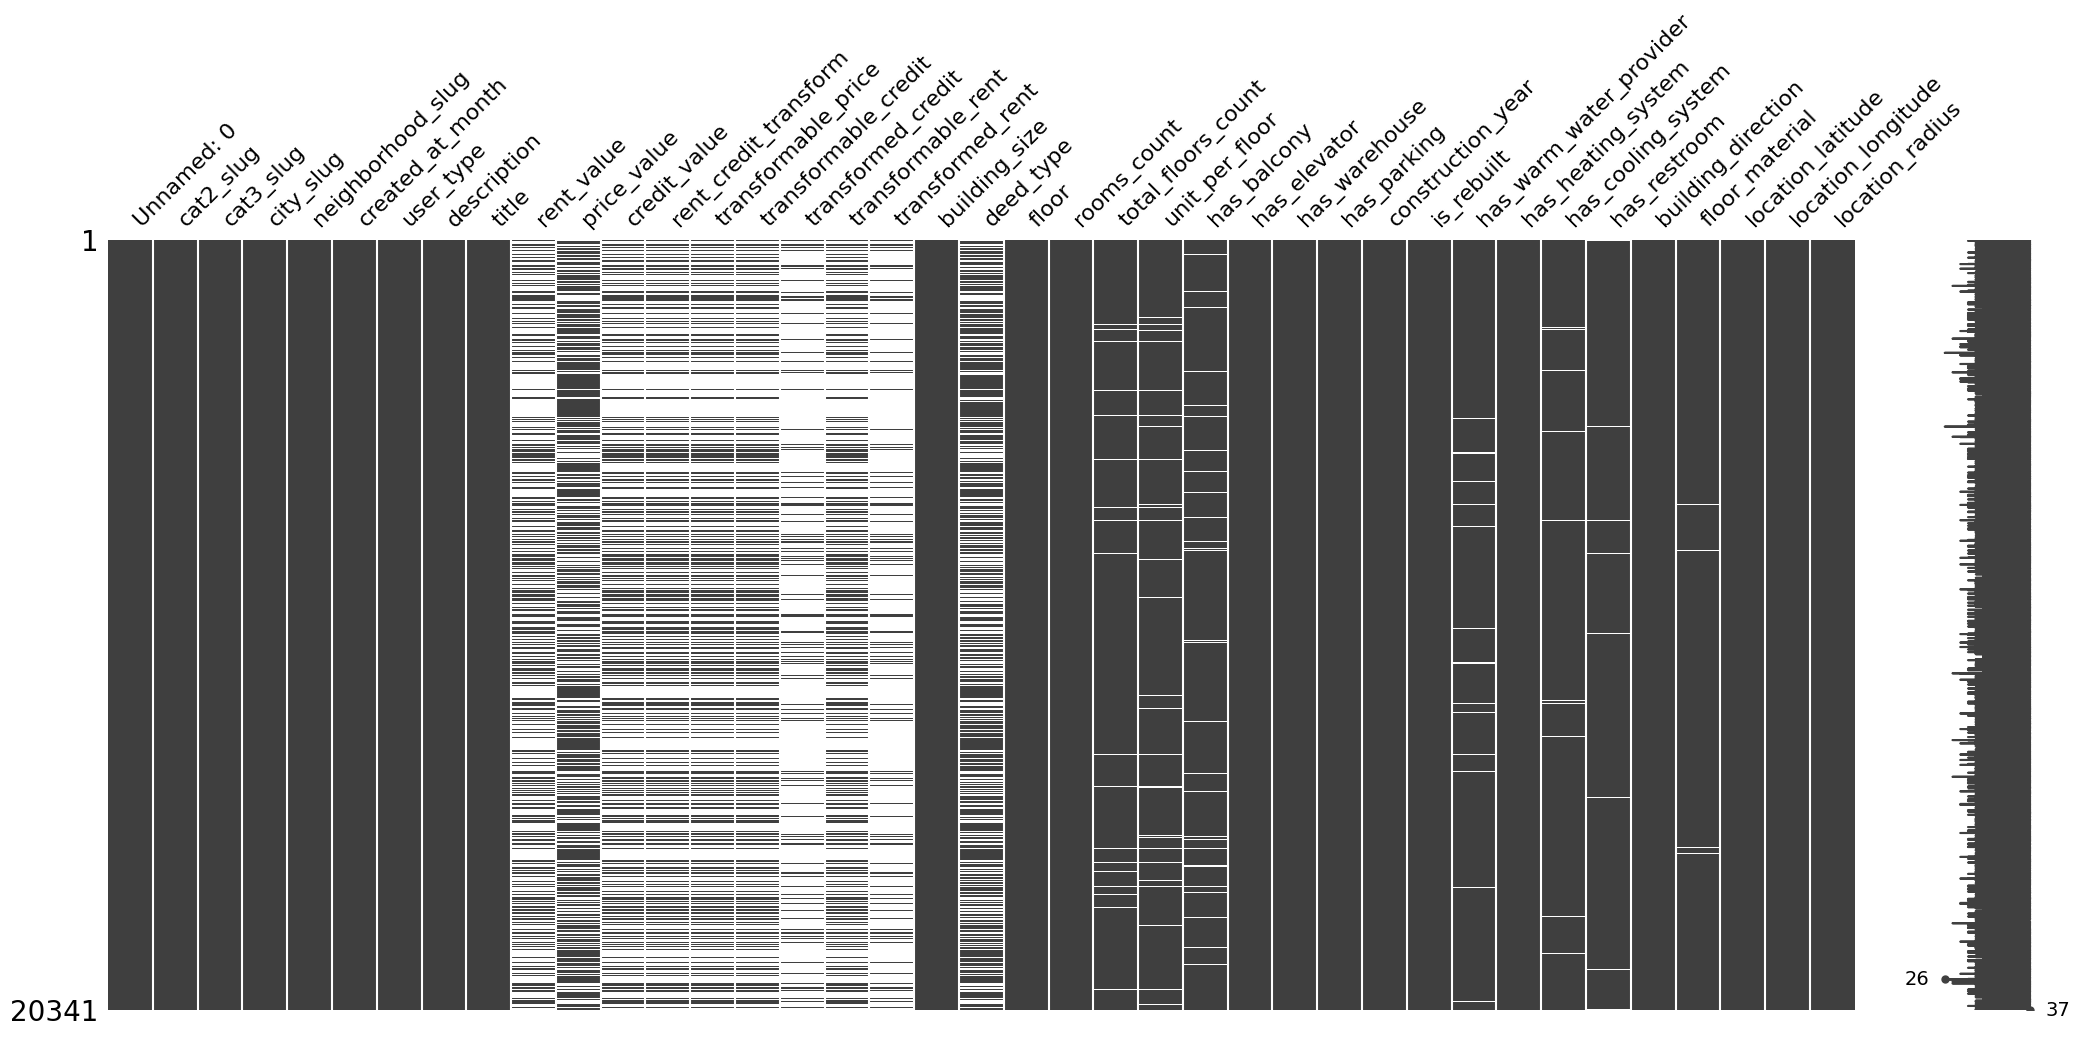

In [35]:
# same as before 
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius', 'has_heating_system',
                                'user_type', 'building_direction', 'is_rebuilt']))

<Axes: >

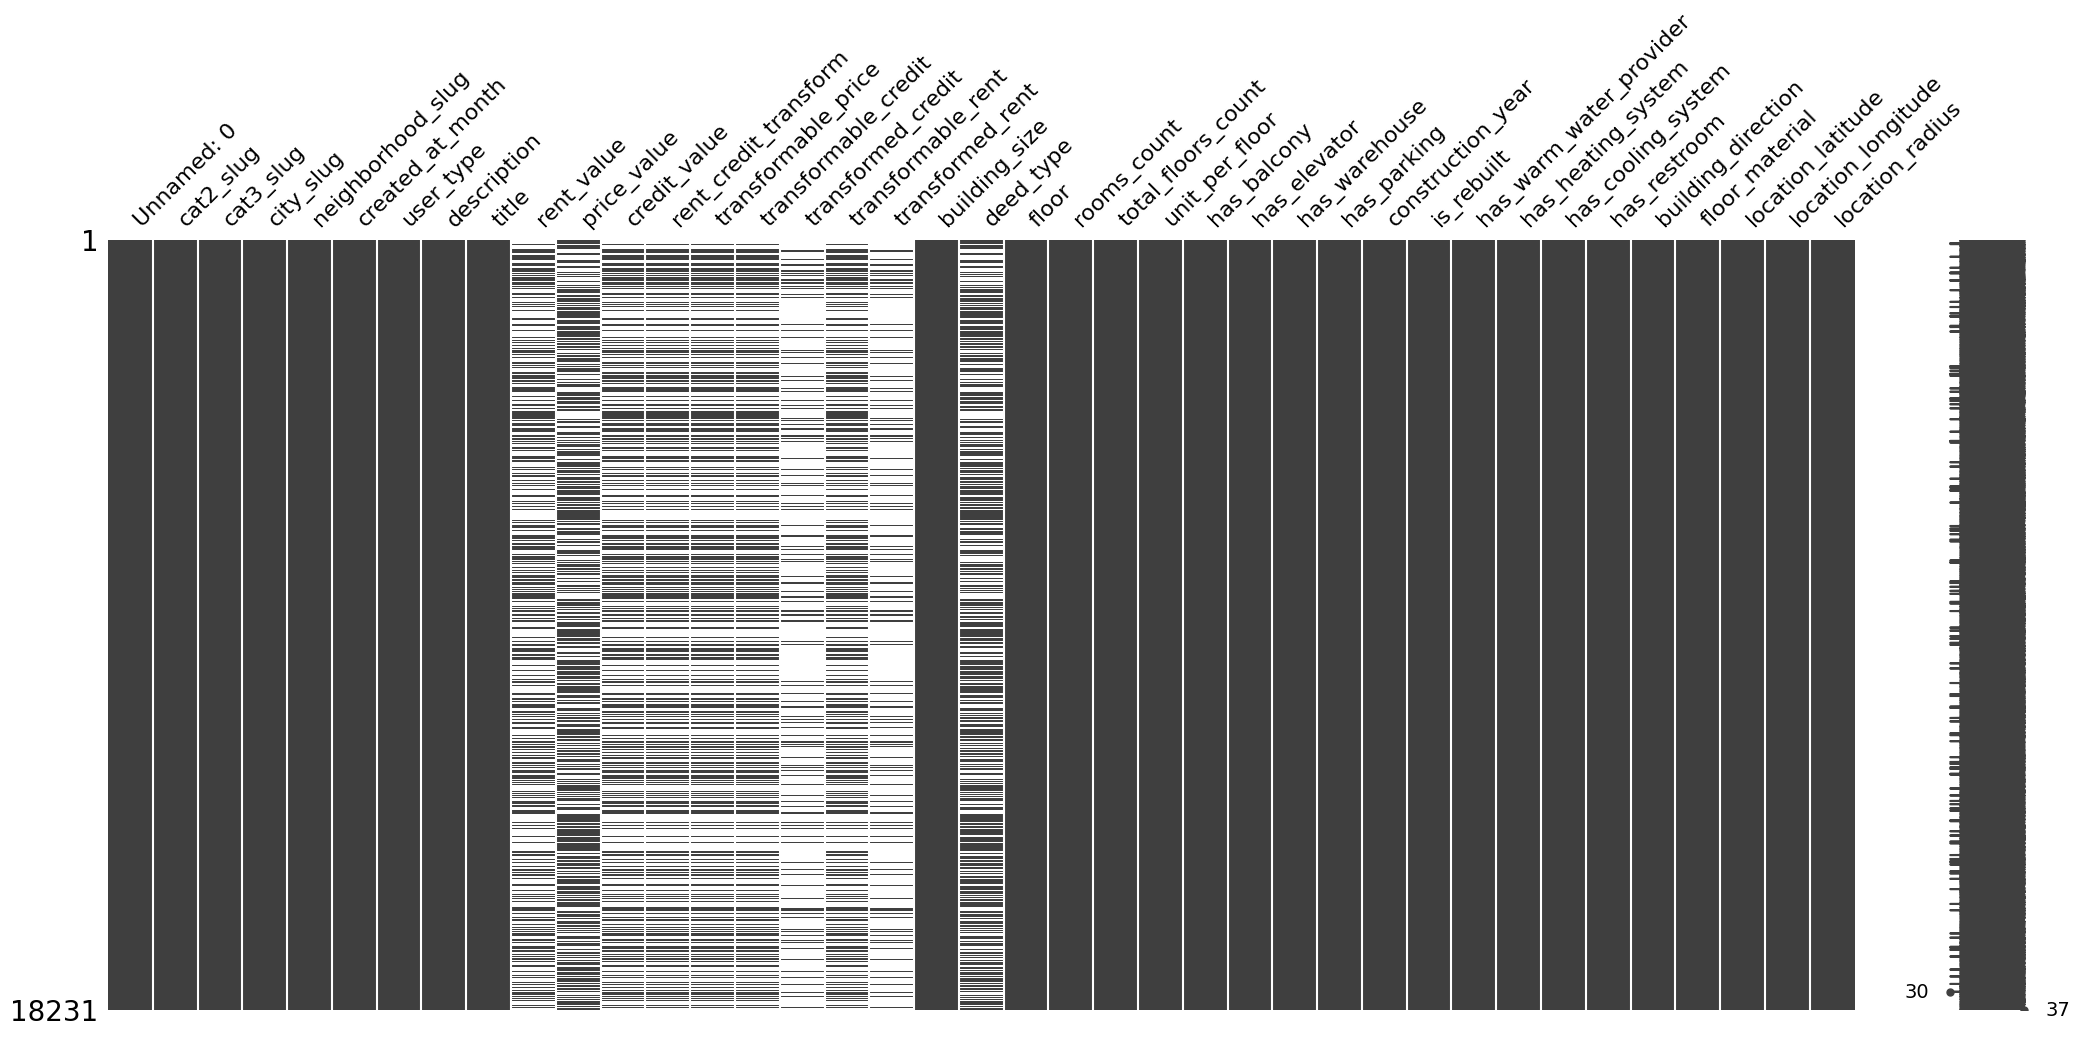

In [36]:
# if dropna on neighborhood_slug
msno.matrix(data.dropna(subset=['neighborhood_slug', 'location_radius', 'has_heating_system',
                                'user_type', 'building_direction', 'is_rebuilt', 'total_floors_count',
                                'unit_per_floor', 'has_balcony', 'has_warm_water_provider', 'has_cooling_system', 
                                'floor_material', 'has_restroom']))

Now we have somehow clean data with proper number of records (18 thousand) for an ML task.

In [14]:
drop_nan_rows = ['neighborhood_slug', 'location_radius', 'has_heating_system',
                                'building_direction', 'is_rebuilt', 'total_floors_count',
                                'unit_per_floor', 'has_balcony', 'has_warm_water_provider', 'has_cooling_system', 
                                'floor_material', 'has_restroom']
cols_to_drop = ['deed_type']
data.dropna(subset=drop_nan_rows, inplace=True)
data.drop(columns=cols_to_drop, inplace=True)

<Axes: >

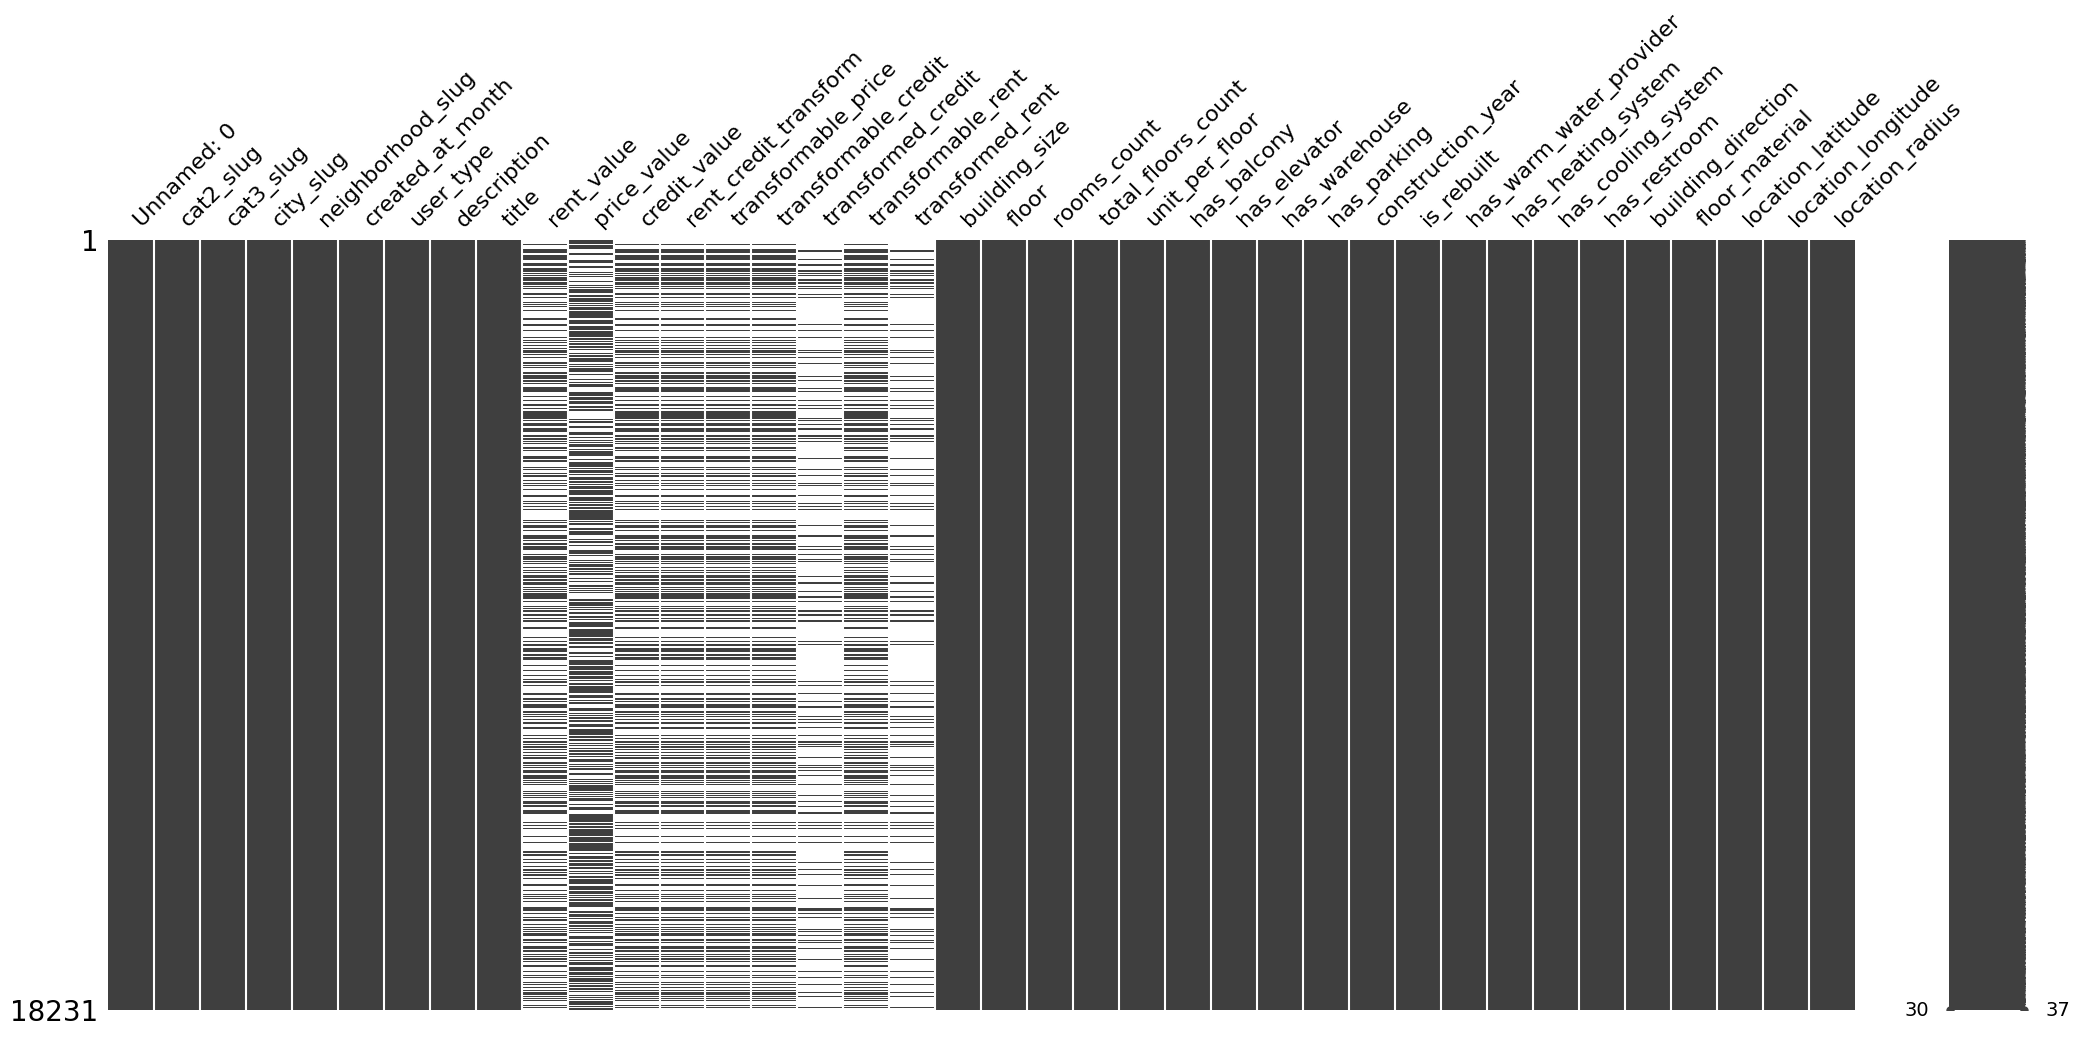

In [38]:
msno.matrix(data)

## Phase 3 of Handling Missing Values

### Scaling

In [ ]:
to_million_tomans = lambda x: x / 10 ** 6
data['rent_value'] = data.rent_value.apply(to_million_tomans)
#TODO

43         NaN
48         0.0
66         NaN
183       17.0
277        0.0
          ... 
999530    40.0
999551     0.0
999578     NaN
999687    26.0
999851     NaN
Name: rent_value, Length: 18231, dtype: float64

### Description

In [90]:
data.description.str.contains('ریال').mean()

np.float64(0.08512972409631946)

### Rent_value, Credit_value & Price_value

In [ ]:
data[['rent_value', 'credit_value', 'price_value']].head(8)

,city_slug,neighborhood_slug,building_size,rent_value,credit_value,price_value
43,mashhad,ghasemabad,110.0,NaN,NaN,3.500000e+09
48,tehran,west-tehranpars,86.0,0.0,1.500000e+09,NaN
66,karaj,andishehnewcity,107.0,NaN,NaN,5.400000e+09
183,tehran,almahdi,95.0,17000000.0,4.000000e+08,NaN
277,tehran,west-tehranpars,50.0,0.0,5.300000e+08,NaN
281,isfahan,negarestan,137.0,NaN,NaN,6.850000e+09
294,tehran,tehran-lashkar,40.0,NaN,NaN,3.280000e+09
303,tehran,south-shahran,63.0,NaN,NaN,4.250000e+09


In [40]:
# checking rent_value and credit_value simultaneous presence
(data.credit_value.isna() == data.rent_value.isna()).all()

np.True_

<div dir='rtl'>
هر جایی rent_value داریم credit_value هم داریم.
</div>

In [49]:
# checking rent_value and price_value complementary presence
(data.rent_value.isna() == data.price_value.notna()).all()

np.True_

<div dir='rtl'>
هر جایی که rent_value نداریم به جاش price_value داریم
</div>

There is some sort of complementarity between these columns.

### Rent_Credit_Transform & Transformable_Price 

In [43]:
data[['rent_credit_transform', 'transformable_price']].head(8)

,rent_credit_transform,transformable_price
43,NaN,NaN
48,True,True
66,NaN,NaN
183,True,True
277,False,False
281,NaN,NaN
294,NaN,NaN
303,NaN,NaN


<code>rent_credit_transform</code> and <code>transformable_price</code> are identical.

In [44]:
# do rent_credit_transform and transformable_price have same missing rows
(data.rent_credit_transform.isna() == data.transformable_price.isna()).all()

np.True_

In [45]:
# are rent_credit_transform and transformable_price identical?
transform_data = data.dropna(subset=['rent_credit_transform'])
(transform_data.rent_credit_transform == transform_data.transformable_price).all()

np.True_

Since <code>rent_credit_transform</code> and <code>transformable_price</code> are of same dtype (bool) and also identical, we rename one of the columns to prevent confusion due to name similarity with <code>transformable_credit</code>. And drop the other due to abundancy.

In [15]:
# dropping the other column
data.drop('transformable_price', axis=1, inplace=True)

In [16]:
data.rename({'rent_credit_transform': 'transformable'}, axis=1, inplace=True)

In [60]:
# rent_credit_transform and transformable_credit simultaneous missing?
(data.rent_credit_transform.isna() == data.transformable_credit.isna()).all()

np.True_

<div dir='rtl'>
هر جایی که rent_credit_tranform گمشده است tranformable_credit هم گمشده است.</div>

In [61]:
# transformable_credit and transformable_rent simultaneous missing?
(data.transformable_credit.isna() == data.transformable_rent.isna()).all()

np.True_

### Credit_value & Transformable_Credit

So, <code>transformable_credit</code> is abundant. As you see.

In [47]:
data[['credit_value', 'transformable_credit']].head(10)

,credit_value,transformable_credit
43,NaN,NaN
48,1.500000e+09,1.500000e+09
66,NaN,NaN
183,4.000000e+08,4.000000e+08
277,5.300000e+08,5.300000e+08
281,NaN,NaN
294,NaN,NaN
303,NaN,NaN
321,2.000000e+08,2.000000e+08
404,7.000000e+08,7.000000e+08


In [48]:
# checking same missing rows
(data.credit_value.isna() == data.transformable_credit.isna()).all()

np.True_

In [49]:
# checking validity: are credit_value and transformable_credit the same? (assuming not null)
temp = data[data.transformable_credit.notna()] # assuming not null part
(temp.credit_value == temp.transformable_credit).all()

np.True_

In [50]:
(data.credit_value == data.transformable_credit).all()

np.False_

In [51]:
# dropping column due to abundancy
data.drop('transformable_credit', axis=1, inplace=True)

### Rent_value & Transformable_Rent

<code>transformable_rent</code> is also abundant.

In [52]:
data[['rent_value', 'transformable_rent']].head(10)

,rent_value,transformable_rent
43,NaN,NaN
48,0.0,0.0
66,NaN,NaN
183,17000000.0,17000000.0
277,0.0,0.0
281,NaN,NaN
294,NaN,NaN
303,NaN,NaN
321,12500000.0,12500000.0
404,29000000.0,29000000.0


In [53]:
# checking same missing rows
(data.rent_value.isna() == data.transformable_rent.isna()).all()

np.True_

In [54]:
# checking validity: are rent_value and transformable_rent the same? (assuming not null)
temp = data[data.transformable_rent.notna()] # assuming not null part
(temp.rent_value == temp.transformable_rent).all()

np.True_

In [55]:
# dropping column due to abundancy
data.drop('transformable_rent', axis=1, inplace=True)

### Credit_value & Transformed_credit

In [59]:
data[['credit_value', 'transformable', 'transformed_credit']].head(10)

,credit_value,transformable,transformed_credit
43,NaN,NaN,NaN
48,1.500000e+09,True,750000000.0
66,NaN,NaN,NaN
183,4.000000e+08,True,450000000.0
277,5.300000e+08,False,NaN
281,NaN,NaN,NaN
294,NaN,NaN,NaN
303,NaN,NaN,NaN
321,2.000000e+08,True,150000000.0
404,7.000000e+08,True,500000000.0


In [70]:
transformable_data = data[data['transformable'] == True]

In [82]:
sns.set_theme()

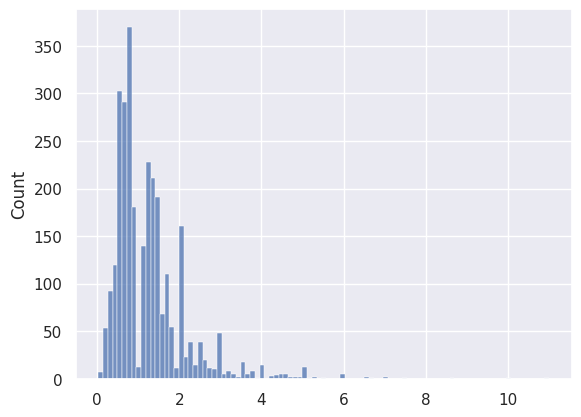

In [83]:
credit_ratio = transformable_data['transformed_credit'] / transformable_data['credit_value']
sns.histplot(credit_ratio)
plt.show()

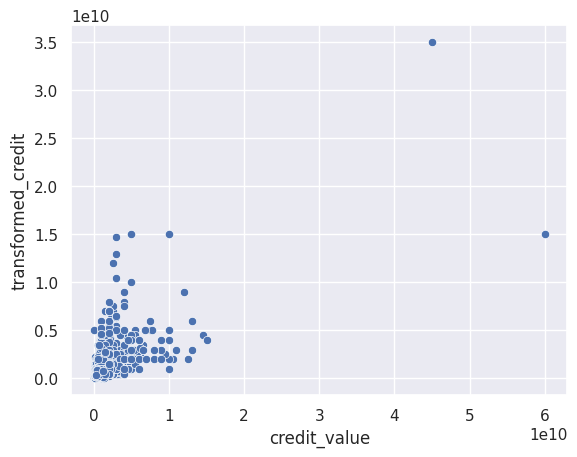

In [84]:
sns.scatterplot(data=transformable_data, x='credit_value', y='transformed_credit')
plt.show()

### Rent_Value & Transformed_Rent

In [61]:
data[['rent_value', 'transformable', 'transformed_rent']].head(10)

,rent_value,transformable,transformed_rent
43,NaN,NaN,NaN
48,0.0,True,22500000.0
66,NaN,NaN,NaN
183,17000000.0,True,16000000.0
277,0.0,False,NaN
281,NaN,NaN,NaN
294,NaN,NaN,NaN
303,NaN,NaN,NaN
321,12500000.0,True,14000000.0
404,29000000.0,True,35000000.0


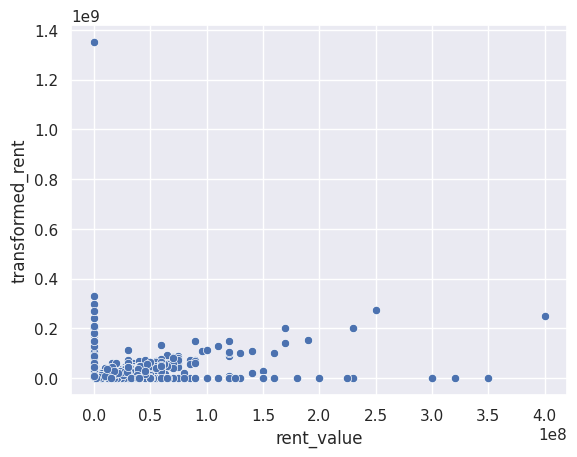

In [85]:
sns.scatterplot(data=transformable_data, x='rent_value', y='transformed_rent')
plt.show()

In [87]:
data[data['transformed_rent'] == 0][['rent_value', 'transformed_rent']].head()

,rent_value,transformed_rent
6779,2000000.0,0.0
7029,12000000.0,0.0
9439,70000000.0,0.0
9508,7000000.0,0.0
9653,12000000.0,0.0


In [17]:
data.to_csv('somehow_preprocessed.csv')

In [4]:
data = pd.read_csv('somehow_preprocessed.csv')
data.head()

,Unnamed: 0,cat2_slug,cat3_slug,city_slug,neighborhood_slug,created_at_month,description,title,rent_value,price_value,...,is_rebuilt,has_warm_water_provider,has_heating_system,has_cooling_system,has_restroom,building_direction,floor_material,location_latitude,location_longitude,location_radius
0,12,residential-sell,apartment-sell,mashhad,farhang,2024-06-01 00:00:00,با سلام\n\n✨✨ شما لایق بهترین ها هستید ✨✨\n\n✅...,تاپ لوکیشن جلال سروش ۱۶۹متر کلید موجود قبل فرهنگ,NaN,1.299000e+10,...,False,package,duct_split,duct_split,squat_seat,south,ceramic,36.321831,59.524502,500.0
1,43,residential-sell,apartment-sell,mashhad,ghasemabad,2024-06-01 00:00:00,▪️▫️⚜بنام خداوند روزی دهنده مهربان⚜▫️▪️ \n\n\n...,آپارتمان ۱۱۰متری*خوش چیدمان*۸واحدی/ فلاحی۳۸,NaN,3.500000e+09,...,True,package,shoofaj,water_cooler,squat_seat,south,ceramic,36.365303,59.499275,500.0
2,48,residential-rent,apartment-rent,tehran,west-tehranpars,2024-07-01 00:00:00,✅.....املاک بزرگ تهرانپارس:سام.....✅\n\n\n86 م...,86متر*2خواب*کلید نخورده*فول*بهترین لوکیشن,0.0,NaN,...,True,package,shoofaj,water_cooler,squat_seat,south,stone,35.739414,51.525150,500.0
3,66,residential-sell,apartment-sell,karaj,andishehnewcity,2024-05-01 00:00:00,♻️این واحد یه پیشنهاد عالی برای شما اگه دوست د...,آپارتمان۱۰۷متری،روبه نما،فول امکانات،شهرک صدف,NaN,5.400000e+09,...,True,package,shoofaj,air_conditioner,squat,north,ceramic,35.688915,51.039005,500.0
4,82,residential-rent,apartment-rent,tehran,hekmat,2024-10-01 00:00:00,♻️♦️کل عکسهای واحد موجود میباشد♻️\n\n✅️ مشخصات...,اندرزگو ۱۶۰ متری,60000000.0,NaN,...,False,package,duct_split,duct_split,squat_seat,south,stone,35.799187,51.445717,500.0


In [5]:
data.set_index('Unnamed: 0', inplace=True)

In [7]:
data.columns

Index(['cat2_slug', 'cat3_slug', 'city_slug', 'neighborhood_slug',
       'created_at_month', 'description', 'title', 'rent_value', 'price_value',
       'credit_value', 'transformable', 'transformable_credit',
       'transformed_credit', 'transformable_rent', 'transformed_rent',
       'building_size', 'floor', 'rooms_count', 'total_floors_count',
       'unit_per_floor', 'has_balcony', 'has_elevator', 'has_warehouse',
       'has_parking', 'construction_year', 'is_rebuilt',
       'has_warm_water_provider', 'has_heating_system', 'has_cooling_system',
       'has_restroom', 'building_direction', 'floor_material',
       'location_latitude', 'location_longitude', 'location_radius'],
      dtype='object')

In [6]:
data[['price_value', 'rent_value', 'transformed_rent', 'credit_value', 'transformed_credit']]

,price_value,rent_value,transformed_rent,credit_value,transformed_credit
Unnamed: 0,,,,,
12,1.299000e+10,NaN,NaN,NaN,NaN
43,3.500000e+09,NaN,NaN,NaN,NaN
48,NaN,0.0,22500000.0,1.500000e+09,7.500000e+08
66,5.400000e+09,NaN,NaN,NaN,NaN
82,NaN,60000000.0,0.0,1.500000e+09,3.500000e+09
...,...,...,...,...,...
999578,2.500000e+09,NaN,NaN,NaN,NaN
999687,NaN,26000000.0,NaN,3.000000e+08,NaN
999737,NaN,0.0,4500000.0,9.500000e+08,8.000000e+08


### Scaling

In [8]:
to_million_tomans = lambda x: x / 10 ** 6
data['rent_value'] = data.rent_value.apply(to_million_tomans)
data['price_value'] = data.price_value.apply(to_million_tomans)
data['credit_value'] = data.credit_value.apply(to_million_tomans)
data['transformable_credit'] = data.transformable_credit.apply(to_million_tomans)
data['transformed_credit'] = data.transformed_credit.apply(to_million_tomans)
data['transformable_rent'] = data.transformable_rent.apply(to_million_tomans)
data['transformed_rent'] = data.transformed_rent.apply(to_million_tomans)

In [9]:
data[['price_value', 'rent_value', 'transformed_rent', 'credit_value', 'transformed_credit']]

,price_value,rent_value,transformed_rent,credit_value,transformed_credit
Unnamed: 0,,,,,
12,12990.0,NaN,NaN,NaN,NaN
43,3500.0,NaN,NaN,NaN,NaN
48,NaN,0.0,22.5,1500.0,750.0
66,5400.0,NaN,NaN,NaN,NaN
82,NaN,60.0,0.0,1500.0,3500.0
...,...,...,...,...,...
999578,2500.0,NaN,NaN,NaN,NaN
999687,NaN,26.0,NaN,300.0,NaN
999737,NaN,0.0,4.5,950.0,800.0


In [10]:
data['estimated_price'] = (data.transformed_rent / 3 * 100 + data.transformed_credit) * 8

In [11]:
data[['price_value', 'estimated_price']]

,price_value,estimated_price
Unnamed: 0,,
12,12990.0,NaN
43,3500.0,NaN
48,NaN,12000.0
66,5400.0,NaN
82,NaN,28000.0
...,...,...
999578,2500.0,NaN
999687,NaN,NaN
999737,NaN,7600.0


In [17]:
data['merged_price'] = data['price_value'].fillna(data['estimated_price'])

In [18]:
data.dropna(subset=['merged_price'], inplace=True)

In [19]:
data.shape

(22602, 37)

In [23]:
price_q1 = data.merged_price.quantile(0.25)
price_q3 = data.merged_price.quantile(0.75)
price_iqr = price_q3 - price_q1
price_lower_b = price_q1 - 1.5 * price_iqr
price_upper_b = price_q3 + 1.5 * price_iqr
data = data[data.merged_price >= price_lower_b]
data = data[data.merged_price <= price_upper_b]

In [24]:
data.shape

(20760, 37)

<Axes: >

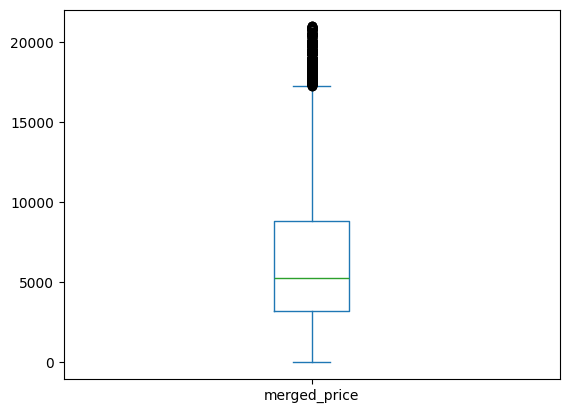

In [25]:
data.merged_price.plot.box()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20760 entries, 12 to 999851
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   cat2_slug                20760 non-null  object 
 1   cat3_slug                20760 non-null  object 
 2   city_slug                20760 non-null  object 
 3   neighborhood_slug        20760 non-null  object 
 4   created_at_month         20760 non-null  object 
 5   description              20760 non-null  object 
 6   title                    20760 non-null  object 
 7   rent_value               3843 non-null   float64
 8   price_value              16917 non-null  float64
 9   credit_value             3843 non-null   float64
 10  transformable            3843 non-null   object 
 11  transformable_credit     3843 non-null   float64
 12  transformed_credit       3843 non-null   float64
 13  transformable_rent       3843 non-null   float64
 14  transformed_rent         

In [29]:
data.drop(['rent_value', 'price_value', 'credit_value', 'transformable', 'transformable_credit', 'transformed_credit',
           'transformable_rent', 'transformed_rent', 'estimated_price'], axis=1, inplace=True)

In [30]:
data.shape

(20760, 28)

In [31]:
data.to_csv('preprocessed_data.csv')